$\Large{\text{Notebook to reproduce the results of:}}$

$\Large{\text{Bernard E, Tuechler H, Greenberg L.P., et al. }}$

$\Large{\textit{Molecular International Prognostic Scoring System
for Myelodysplastic Syndromes}}$

# Load Packages

In [886]:
library(ggplot2)
library(cowplot)
library(dplyr)
library(tidyr)
library(ggsci)
library(ggpubr)
library(MetBrewer)
library(survival)
library(survminer)
library(cmprsk)
library(RColorBrewer)

In [887]:
# IPSS-M package
library(ipssm)

# Read Data

In [795]:
# Clinical data
ddc <- read.table("./data/df_clinical.tsv", header=T, sep="\t", stringsAsFactors = F)
# CNA binary data
ddcyto <- read.table("./data/df_cna.tsv", header=T, sep="\t", stringsAsFactors = F)
# Mutation binary data
ddmut <- read.table("./data/df_mut.tsv", header=T, sep="\t", stringsAsFactors = F)
# Mutation in MAF format (i.e. one line per mutation per patient)
maf <- read.table("./data/maf.tsv", header=T, sep="\t", stringsAsFactors = F)

In [796]:
# Clinical data
colnames(ddc)
nrow(ddc)

[1] "ID"                      "MDS_TYPE"               
 [3] "SEX"                     "AGE"                    
 [5] "WHO_2016"                "BM_BLAST"               
 [7] "PB_BLAST"                "WBC"                    
 [9] "ANC"                     "MONOCYTES"              
[11] "HB"                      "PLT"                    
[13] "RINGED_SIDEROBLASTS"     "IPSSR"                  
[15] "IPSSR_SCORE"             "IPSSRA"                 
[17] "IPSSRA_SCORE"            "IPSSM"                  
[19] "IPSSM_SCORE"             "CYTOGENETICS"           
[21] "CYTO_IPSSR"              "complex"                
[23] "chr17"                   "CNACS_chrarm_loss"      
[25] "CNACS_gene_loss"         "CNACS_chrarm_gain"      
[27] "CNACS_gene_gain"         "CNACS_chrarm_upd"       
[29] "CNACS_gene_upd"          "OS_YEARS"               
[31] "OS_STATUS"               "AMLt_YEARS"             
[33] "AMLt_STATUS"             "LFS_YEARS"              
[35] "LFS_STATUS"              "hma"                    
[37] "lenalidomid"             "chemotherapy"           
[39] "transplant"              "time_to_treatment_days" 
[41] "time_to_transplant_days" "is_ipssm_sample"

[1] 2957

In [797]:
# Mutation binary data
colnames(ddmut)

[1] "ID"        "TET2"      "ASXL1"     "SF3B1"     "SRSF2"     "DNMT3A"   
  [7] "RUNX1"     "TP53"      "STAG2"     "U2AF1"     "EZH2"      "BCOR"     
 [13] "CBL"       "ZRSR2"     "NRAS"      "IDH2"      "CUX1"      "NF1"      
 [19] "KRAS"      "SETBP1"    "DDX41"     "PHF6"      "JAK2"      "MLL_PTD"  
 [25] "IDH1"      "PTPN11"    "ETV6"      "ETNK1"     "CEBPA"     "MPL"      
 [31] "SH2B3"     "PPM1D"     "BRCC3"     "KMT2C"     "NPM1"      "BCORL1"   
 [37] "GATA2"     "WT1"       "CTCF"      "ZBTB33"    "EP300"     "GNB1"     
 [43] "CSNK1A1"   "ARID2"     "PRPF8"     "ASXL2"     "GNAS"      "U2AF2"    
 [49] "KMT2D"     "KIT"       "NFE2"      "RAD21"     "CREBBP"    "SMC1A"    
 [55] "KDM6A"     "CSF3R"     "DDX54"     "FLT3"      "FLT3_ITD"  "MGA"      
 [61] "LUC7L2"    "SUZ12"     "BRAF"      "EED"       "IRF1"      "ATRX"     
 [67] "DDX4"      "STAT3"     "RAD50"     "CALR"      "ROBO2"     "SMC3"     
 [73] "DDX23"     "ROBO1"     "SETD2"     "TERT"      "DHX33"     "GATA1"    
 [79] "MYC"       "PIK3CA"    "RB1"       "RRAS"      "CDKN2A"    "EGFR"     
 [85] "CSF1R"     "DNMT3B"    "ZMYM3"     "RAC1"      "STAT5A"    "ARID1A"   
 [91] "CHEK2"     "MLL"       "SPRED2"    "KDM5C"     "NOTCH2"    "CDKN1B"   
 [97] "DICER1"    "NIPBL"     "SAMHD1"    "SMG1"      "FAM175A"   "H3F3A"    
[103] "PAPD5"     "SF1"       "SRCAP"     "STAG1"     "WHSC1"     "ABL1"     
[109] "CDKN2B"    "HIPK2"     "NOTCH1"    "PAX5"      "PTEN"      "BAP1"     
[115] "BCL10"     "CDK4"      "CDKN2C"    "IRF4"      "IRF8"      "JAK3"     
[121] "JARID2"    "NF2"       "NXF1"      "PRPF40A"   "PTPRF"     "RBBP4"    
[127] "ZNF318"    "TP53mono"  "TP53multi" "TET2bi"    "TET2other"

In [798]:
# CNA binary data
colnames(ddcyto)

[1] "ID"        "del5q"     "plus8"     "del7"      "del20q"    "delY"     
  [7] "del7q"     "del12p"    "del13"     "plus21"    "del17p"    "del11q"   
 [13] "del18"     "del3p"     "del16q"    "plus13"    "del4q"     "plus22"   
 [19] "plus1p"    "del17"     "del15"     "del1p"     "del21"     "plus11q"  
 [25] "del9q"     "plus14"    "plus15"    "del20"     "del12q"    "del5"     
 [31] "plus19"    "del14"     "del11p"    "plus11"    "del12"     "del16"    
 [37] "del22"     "del18q"    "del2p"     "plus1"     "delX"      "plus17q"  
 [43] "r_1_7"     "del3"      "del3q"     "del6p"     "plus19p"   "plus9"    
 [49] "del2q"     "plus19q"   "plus5p"    "plus9p"    "ring"      "r_3_3"    
 [55] "plus3q"    "plus9q"    "plus2p"    "plus6p"    "plusX"     "r_5_17"   
 [61] "del16p"    "del4p"     "del6q"     "del9"      "plus10"    "plus8q"   
 [67] "r_5_7"     "iso17q"    "del1q"     "plus20"    "plus3p"    "plus6"    
 [73] "del8"      "del10"     "del19"     "del2"      "del7p"     "plus12"   
 [79] "plus12q"   "plus20q"   "del20p"    "del4"      "del6"      "del8p"    
 [85] "plus16q"   "plus5"     "plusY"     "r_12_17"   "r_3_7"     "r_7_7"    
 [91] "plus12p"   "del18p"    "plus11p"   "plus18"    "r_12_12"   "r_2_11"   
 [97] "r_3_5"     "r_7_17"    "del1"      "del11"     "del17q"    "plus10p"  
[103] "plus16p"   "plus20p"   "plus4q"    "plus7p"    "r_1_5"     "r_17_17"  
[109] "r_5_5"     "r_x_x"     "plus17p"   "plus7q"    "plus5q"    "del10q"   
[115] "del19q"    "del8q"     "plus18p"   "r_1_12"    "r_1_2"     "r_1_20"   
[121] "r_2_3"     "r_2_7"     "r_20_21"   "r_21_21"   "r_3_21"    "r_4_12"   
[127] "r_6_9"     "del10p"    "del21p"    "del9p"     "delXq"     "plus2"    
[133] "plus21q"   "plus2q"    "plus3"     "plus6q"    "plus7"     "plus8p"   
[139] "r_1_13"    "r_1_3"     "r_1_8"     "r_1_9"     "r_12_15"   "r_13_13"  
[145] "r_13_20"   "r_14_21"   "r_17_18"   "r_17_20"   "r_2_20"    "r_22_22"  
[151] "r_3_18"    "r_3_6"     "r_4_4"     "r_5_13"    "r_5_18"    "r_6_6"    
[157] "r_7_18"    "r_7_19"    "r_7_21"    "r_8_12"    "r_8_8"     "r_9_12"   
[163] "r_9_21"    "plus18q"   "plus17"    "del19p"    "plus10q"   "plus4"    
[169] "plus4p"    "plusXq"    "r_1_10"    "r_1_11"    "r_1_14"    "r_1_16"   
[175] "r_1_22"    "r_1_4"     "r_1_6"     "r_10_10"   "r_10_13"   "r_10_19"  
[181] "r_11_11"   "r_11_13"   "r_11_19"   "r_12_13"   "r_12_22"   "r_14_17"  
[187] "r_15_19"   "r_16_20"   "r_17_21"   "r_19_20"   "r_2_10"    "r_2_2"    
[193] "r_2_5"     "r_2_6"     "r_3_11"    "r_3_17"    "r_3_4"     "r_3_9"    
[199] "r_4_11"    "r_5_19"    "r_5_22"    "r_6_13"    "r_7_12"    "r_7_15"   
[205] "r_7_20"    "r_8_14"    "r_9_16"    "r_9_22"    "delXp"     "r_1_1"    
[211] "r_1_15"    "r_1_17"    "r_1_19"    "r_1_21"    "r_1_3_14"  "r_1_4_15" 
[217] "r_1_5_10"  "r_1_Y"     "r_10_11"   "r_10_15"   "r_10_16"   "r_11_12"  
[223] "r_11_14"   "r_11_16"   "r_11_17"   "r_11_22"   "r_12_16"   "r_12_18"  
[229] "r_13_14"   "r_13_18"   "r_13_21"   "r_13_22"   "r_14_14"   "r_14_18"  
[235] "r_15_17"   "r_15_18"   "r_15_20"   "r_15_21"   "r_15_22"   "r_16_19"  
[241] "r_17_22"   "r_18_19"   "r_18_21"   "r_19_19"   "r_2_13"    "r_2_15"   
[247] "r_2_17"    "r_2_19"    "r_2_21"    "r_2_22"    "r_2_3_6"   "r_2_5_7"  
[253] "r_2_8"     "r_20_20"   "r_21_22"   "r_3_10"    "r_3_13"    "r_3_14"   
[259] "r_3_16"    "r_3_19"    "r_3_8"     "r_4_10"    "r_4_17"    "r_4_18"   
[265] "r_4_21"    "r_4_5"     "r_4_7"     "r_4_8"     "r_4_9"     "r_5_12"   
[271] "r_5_13_16" "r_5_14"    "r_5_15"    "r_5_20"    "r_5_21"    "r_5_8"    
[277] "r_6_11"    "r_6_12"    "r_6_15"    "r_6_19"    "r_6_20"    "r_6_22"   
[283] "r_6_7"     "r_7_13"    "r_7_16"    "r_7_22"    "r_7_8"     "r_8_13"   
[289] "r_8_17"    "r_8_18"    "r_8_21"    "r_8_9"     "r_9_11"    "r_9_17"   
[295] "r_9_19"    "r_x_14"    "r_x_16"    "r_x_17"    "r_x_19"    "r_x_4"    
[301] "r_x_5"     "r_x_6"     "r_y_11"    "r_y_11_20" "r_y_13"    "r_y_5"

In [799]:
# Mutation in MAF format
head(maf,1)
nrow(maf)

ID                   CHR START     END       REF ALT GENE cDNA_CHANGE
1 E-H-100000-T1-1-D1-1 11  119149248 119149248 G   A   CBL  c.1256G>A  
  PROTEIN_CHANGE VT  EFFECT               VAF   DEPTH
1 p.C419Y        Sub non_synonymous_codon 0.083 1308

[1] 9254

In [800]:
# Master Dataframe
dd <- left_join(ddc, ddmut, by="ID")
dd <- left_join(dd, ddcyto, by="ID")

# Get Ready

In [801]:
# Some Plotting Utils
gtheme <- function(size=18) {
    theme(text=element_text(size=size,colour="black"),
          axis.text=element_text(size=size,colour="black"),
          axis.title=element_text(size=size,colour="black"),
          strip.text.x = element_text(size=size),
          legend.text=element_text(size=size))
}
noleg = theme(legend.position = "none")
topleg = theme(legend.position = "top")
noxtitle = theme(axis.title.x = element_blank())
noytitle = theme(axis.title.y = element_blank())
noxlabel = theme(axis.text.x = element_blank())
noylabel = theme(axis.text.y = element_blank())
nolegtitle = theme(legend.title = element_blank())

In [802]:
# Levels
dd$IPSSR <- factor(dd$IPSSR, levels=c("Very-Low","Low","Int","High","Very-High"))

# Cohort Characteristics

In [803]:
paste("Number of patients is:", nrow(dd))

[1] "Number of patients is: 2957"

In [804]:
table(dd$WHO_2016, exclude=F)


          aCML           CMML      MDS-del5q        MDS-EB1        MDS-EB2 
             5            272            142            458            429 
       MDS-MLD     MDS-RS-MLD     MDS-RS-SLD MDS-RS-SLD/MLD        MDS-SLD 
           639            212            246              3            191 
   MDS-SLD/MLD          MDS-U   MDS/MPN-RS-T      MDS/MPN-U          other 
            91             85             42             51              5 
          <NA> 
            86 

In [805]:
table(dd$IPSSR)


 Very-Low       Low       Int      High Very-High 
      489      1078       562       355       269 

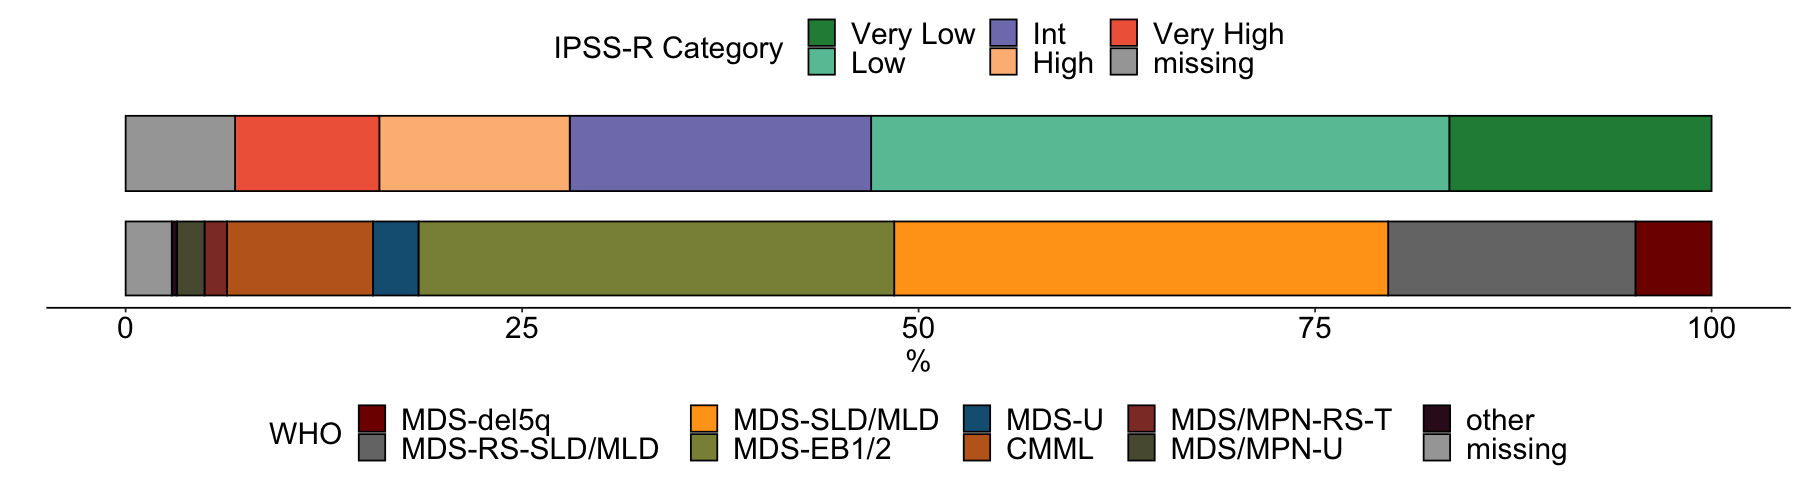

In [806]:
options(repr.plot.width=15, repr.plot.height=2)

dd$who <- dd$WHO_2016
dd$who[dd$who %in% c("MDS-SLD","MDS-MLD")] <- "MDS-SLD/MLD"
dd$who[dd$who %in% c("MDS-RS-SLD","MDS-RS-MLD")] <- "MDS-RS-SLD/MLD"
dd$who[dd$who %in% c("MDS-EB1","MDS-EB2")] <- "MDS-EB1/2"
dd$who[dd$WHO_2016=="aCML"] <- "other"
dd$who <- factor(as.vector(dd$who),levels=c("MDS-del5q",
                                             "MDS-RS-SLD/MLD","MDS-SLD/MLD",
                                              "MDS-EB1/2","MDS-U","CMML","MDS/MPN-RS-T",
                                              "MDS/MPN-U","other"))

gswho <- ggplot(dd, aes(x="", fill=who)) +
geom_bar(position="fill",color="black") + theme_classic() + gtheme(18) + 
xlab("") + ylab("%") +
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_fill_uchicago(name="WHO", labels=c(levels(dd$who),"missing"), na.value="grey65") + 
theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(),axis.text.y=element_blank()) +
coord_flip() + topleg

col.ipssr = c("#238b45","#66c2a4","#807dba","#fdbb84","#ef6548")
gsipss <- ggplot(dd, aes(x="", fill=IPSSR)) + 
geom_bar(position="fill",color="black") + theme_classic() + gtheme(18) + 
xlab("") + ylab("%") +
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_fill_manual(values=col.ipssr,name="IPSS-R Category",
                  labels=c("Very Low","Low","Int","High","Very High","missing"),
                  na.value="grey65"
                  ) + 
theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(),axis.text.y=element_blank()) +
coord_flip() + topleg


options(repr.plot.width=15, repr.plot.height=4)
giw <- ggarrange(gsipss + theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())+ylab(""),
          NULL,
          gswho + theme(legend.position="bottom"),
          heights=c(1,-0.2,1.12),
          ncol=1)
giw

In [807]:
options(warn=-1)
gage <- ggplot(dd, aes(x="",y=AGE)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18)+ noleg + 
coord_trans(ylim=c(40,100)) + 
ylab("Age in years") + xlab("") + 
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ghb <- ggplot(dd, aes(x="",y=HB)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg + 
coord_trans(ylim=c(4,16)) + 
ylab("Hemoglobin in g/dL") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

gplt <- ggplot(dd, aes(x="",y=PLT)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18)+ noleg + 
coord_trans(ylim=c(0,500)) + 
ylab("Platelets in Giga/L") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ganc <- ggplot(dd, aes(x="",y=ANC)) +
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg + 
coord_trans(ylim=c(0,7)) + 
ylab("ANC in Giga/L") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

gblast <- ggplot(dd, aes(x="",y=BM_BLAST)) +
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg +
stat_compare_means(label.y=20,comparisons=list(c(1,2)),label="p.signif",tip.length=0) +
coord_trans(ylim=c(0,20)) +
ylab("Bone marrow blasts in %") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

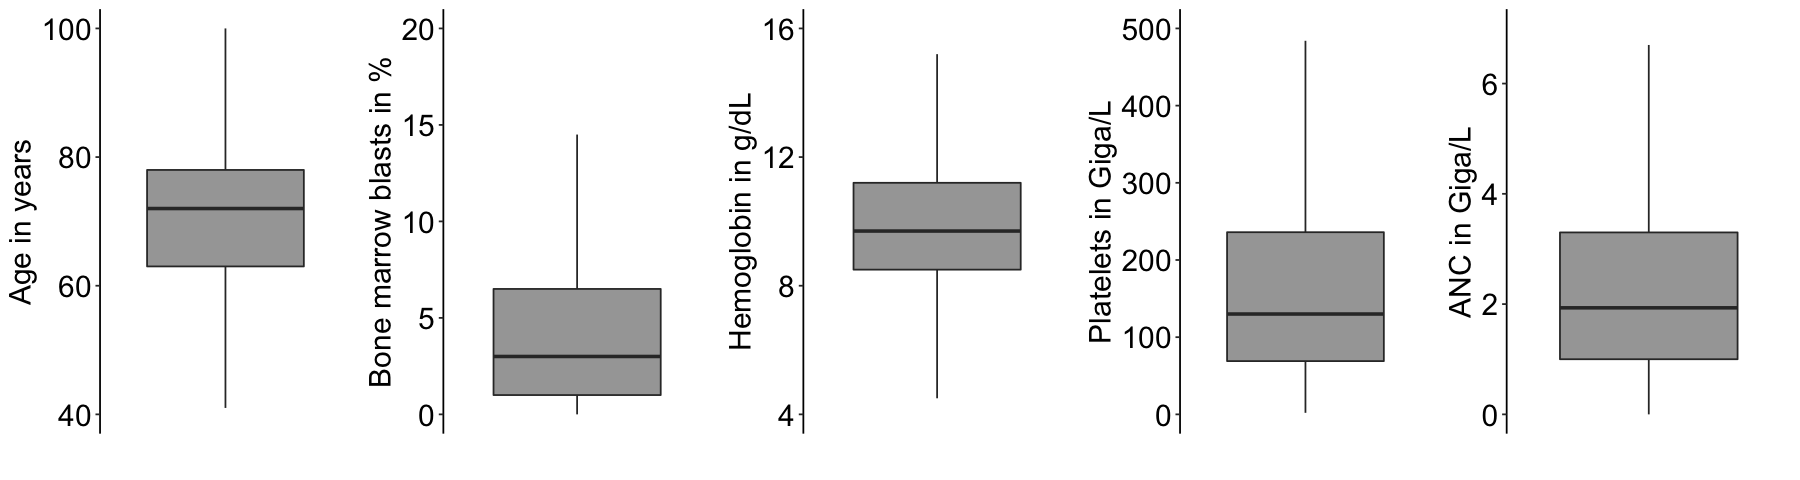

In [808]:
options(repr.plot.width=15, repr.plot.height=4)
gclinical <- ggarrange(gage, gblast, ghb, gplt, ganc, ncol=5)
gclinical

# Figure 1

## Fig 1A

In [809]:
# Function
mutation_effect <- function(vec_vag_effect) {
    # category
    truncated = c("frameshift_variant","complex_change_in_transcript","initiator_codon_change","splice_site_variant","stop_gained","stop_lost","stop_retained_variant","synonymous_codon")
    # note that the synonymous_codon in the dataset affects TP53 
    # ie p.T125T and have been shown to affect splicing and be truncated-like.
    inframe_indel = c("inframe_codon_gain","inframe_codon_loss","inframe_variant")
    missense = c("non_synonymous_codon","synonymous_codon")
    missense = c(missense,"2KB_upstream_variant","3_prime_UTR_variant") 
    # 2KB_upstream_variant = TERT PROMOTER
    # 3_prime_UTR_variant = TET2 UTR
    itdptd = c("ITD","PTD")
    # res
    res = rep(NA, length(vec_vag_effect))
    res[vec_vag_effect %in% truncated] = "truncated"
    res[vec_vag_effect %in% inframe_indel] = "inframe-indel"
    res[vec_vag_effect %in% missense] = "missense"
    res[vec_vag_effect %in% "ITD"] = "itd"
    res[vec_vag_effect %in% "PTD"] = "ptd"
    res[vec_vag_effect %in% "2KB_upstream_variant"] = "promoter"
    #res[vec_vag_effect %in% "3_prime_UTR_variant"] = "utr"
    res[vec_vag_effect %in% "3_prime_UTR_variant"] = "missense"
    return(res)
}

CreateCombineMaf <- function(ddmaf, ddcyto, complex.vector) {
    mymaf = ddmaf
    # simplified effect
    mymaf$Consequence = mutation_effect(mymaf$EFFECT)
    # multiple hits cases
    mymaf$mkey = paste(mymaf$ID, mymaf$GENE, sep="_")
    im = which(duplicated(mymaf$mkey))
    am = unique(mymaf$mkey[im])
    mymaf[mymaf$mkey %in% am,"Consequence"] = "multiple-mutations"
    mymaf = mymaf[-im,]
    rm(im,am)
    mymaf = mymaf[,c("ID","GENE","PROTEIN_CHANGE","Consequence")]
    mymaf$Type = "Gene"
    colnames(mymaf) = c("ID","Identity","Change","Consequence","Type")
    # ADD CYTO TO MAF
    tmp = ddcyto[,-1]
    tmp$complex = 0
    tmp$complex[which(complex.vector=="complex")] = 1
    rownames(tmp) = ddcyto[,1]
    resf = lapply(rownames(tmp), function(x) {
                      ia = which(tmp[rownames(tmp)==x,]==1)
                      if (length(ia)>0) {
                          ca = colnames(tmp)[ia]
                          return(data.frame(ID=rep(x,length(ca)),
                                            Identity=ca, Change=rep("chromosomal",length(ca)),Consequence=rep("chromosomal",length(ca)),Type="Chromosome"))
                      } else {
                          return(NULL)
                      }
                       })
    mymaf = rbind(mymaf, do.call("rbind",resf))
    mymaf$Consequence2 = mymaf$Consequence
    mymaf$Consequence2[mymaf$Type=="Chromosome" & (grepl("del",mymaf$Alteration)|grepl("plus",mymaf$Alteration))] = "copy-number-change"
    mymaf$Consequence2[mymaf$Type=="Chromosome" & grepl("upd",mymaf$Alteration)] = "copy-neutral-loh"
    mymaf$Consequence2[mymaf$Type=="Chromosome" & grepl("r_",mymaf$Alteration)] = "rearrangement"

    mymaf$Identity = factor(mymaf$Identity, levels=rev(names(sort(table(mymaf$Identity)))))
    mymaf$Consequence = factor(mymaf$Consequence, levels=c("missense","inframe-indel","truncated","multiple-mutations","itd","ptd","promoter","utr","chromosomal"))
    mymaf$Consequence2 = factor(mymaf$Consequence2, levels=c("missense","inframe-indel","truncated","multiple-mutations","itd","ptd","promoter","utr","copy-number-change","copy-neutral-loh","rearrangement","chromosomal"))
    return(mymaf)
}

In [810]:
mymaf = CreateCombineMaf(maf, ddcyto,complex.vector=dd$complex)

In [811]:
allgenes <- colnames(ddmut)[2:127]
allcyto <- colnames(ddcyto)[-1]
allcyto <- allcyto[!allcyto %in% "ring"]
gogenes <- unique(c(allgenes[apply(dd[,allgenes],2,sum)>=10],"MLL","FLT3"))
gocyto <- c("complex",allcyto[apply(dd[dd$complex=="non-complex",allcyto],2,sum)>=10])

In [812]:
tmp <- mymaf
tmp$Consequence <- as.vector(tmp$Consequence)
tmp$Consequence[tmp$Consequence%in%c("itd","ptd")] <- "tandem duplication"
tmp$Consequence <- factor(tmp$Consequence, levels=unique(gsub("ptd","tandem duplication",gsub("itd","tandem duplication",levels(mymaf$Consequence)))))
tmp <- tmp[tmp$Identity %in% c(gogenes,gocyto),]

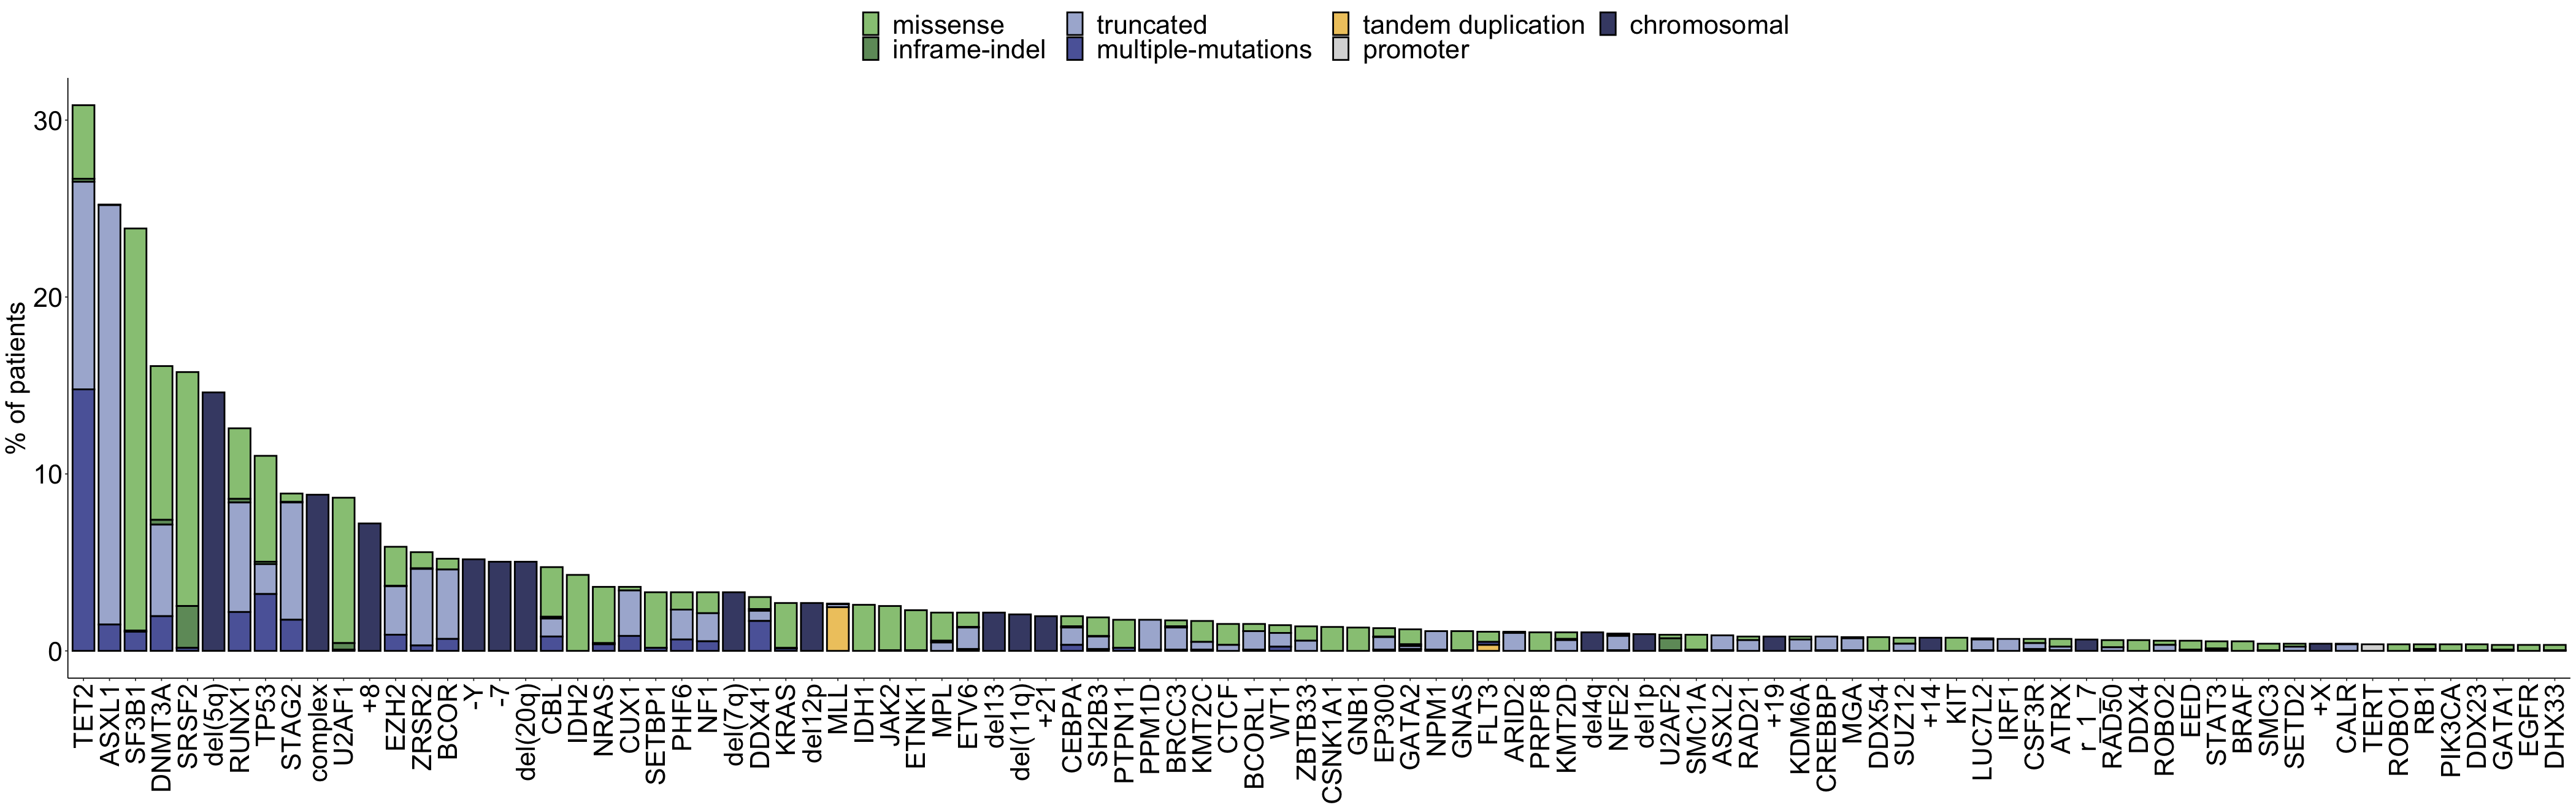

In [813]:
tmp <- mymaf
tmp$Consequence <- as.vector(tmp$Consequence)
tmp$Consequence[tmp$Consequence%in%c("itd","ptd")] <- "tandem duplication"
tmp$Consequence <- factor(tmp$Consequence, levels=unique(gsub("ptd","tandem duplication",gsub("itd","tandem duplication",levels(mymaf$Consequence)))))
tmp <- tmp[tmp$Identity %in% c(gogenes,gocyto),]

lc1 <- levels(tmp$Identity)[levels(tmp$Identity)%in%c(gogenes,gocyto)]
lc11 <- lc1
lc11 <- gsub("del7q","del(7q)",gsub("delY","-Y",gsub("plus","+",gsub("del5q","del(5q)",lc11))))
lc11 <- gsub("del11q","del(11q)",gsub("del7","-7",gsub("del20q","del(20q)",lc11)))

col.fig1a <- met.brewer("Derain")
col.fig1a <- c( col.fig1a[c(2,3,4,6,1)] , "grey85" , col.fig1a[c(7)] )

options(repr.plot.width=35, repr.plot.height=11)
ggplot(tmp) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd)),fill=Consequence), color="black", size=.8, width=.84) +
theme_classic() + gtheme(26) +
topleg + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
noxtitle + ylab("% of patients") +
scale_fill_manual( values=col.fig1a , name="") +
scale_x_discrete(labels=lc11)

## Fig 1B

In [814]:
dd$num_mut <- sapply(dd$ID, function(x) sum(maf$ID==x))
dd$num_cyto <- apply(dd[,allcyto],1,sum)
dd$num_driver <- dd$num_mut + dd$num_cyto

In [815]:
summary(dd$num_mut)
summary(dd$num_driver)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    3.00    3.13    4.00   15.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.136   6.000  20.000 

In [816]:
cc <- 8
dd$range_driver <-  dd$num_driver
dd$range_driver[dd$num_driver>cc] <-  paste0(">",cc)
dd$range_driver <- factor(dd$range_driver, levels=c(0:cc,paste0(">",cc)))

dd$onecase =  sapply(1:nrow(dd), function(i) {
	   x = dd$num_driver[i]
	   res = NA
	   p = dd$ID[i]
	   if (x==1) {
	       res = as.vector(mymaf[mymaf$ID==p,"Identity"])
	   }
	   return(res)
})

aa = dd
a = names(sort(table(dd$onecase),decreasing=T)[1:8])
aa$label = NA
aa$label[!is.na(aa$onecase)] = "other"
aa$label[which(aa$onecase %in% a)] = aa$onecase[which(aa$onecase %in% a)]
aa$label = factor(aa$label, levels=c(a,"other"))
barlev <- gsub("del20q","del(20q)",gsub("delY","-Y",gsub("del5q","del(5q)",levels(aa$label))))

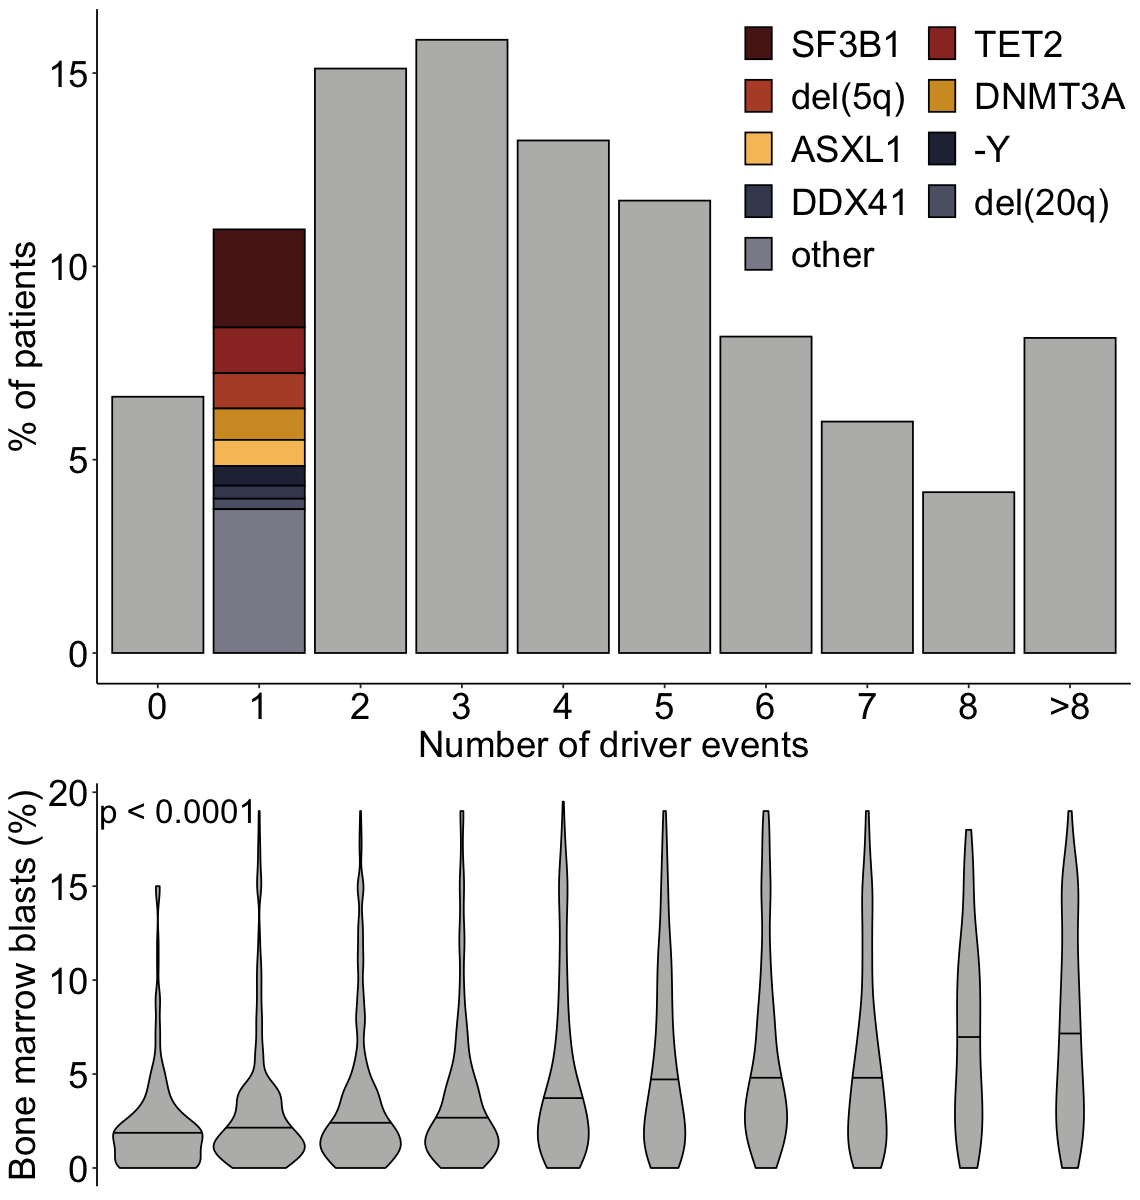

In [817]:
demuth <- met.brewer("Demuth")
col.fig1b <- c(demuth[1:5],demuth[c(10,9,8,7)])

gh0 <- ggplot(aa[!is.na(aa$label),], aes(x=range_driver,fill=label,y=100*..count../sum(..count..))) + 
geom_bar(color="black") + 
theme_classic() + gtheme(22)  + ylab("% of patients") + 
scale_fill_manual(values=col.fig1b,
                  labels=c(barlev,"NA"),
                  na.value=demuth[6]) +  
nolegtitle + xlab("Number of driver events") + 
guides(fill=guide_legend(ncol=2,byrow=TRUE)) + 
theme(legend.position = c(0.8, 0.8)) + nolegtitle

legendh0 <- get_legend(gh0)
histleg <- ggarrange(legendh0)
#histleg

gh <- ggplot(aa, aes(x=range_driver,fill=label,y=100*..count../sum(..count..))) + 
geom_bar(color="black") + 
theme_classic() + gtheme(22)  + ylab("% of patients") + 
scale_fill_manual(values=col.fig1b,
                  labels=c(barlev,"lala"),
                  na.value=demuth[6]) +  
noleg + xlab("Number of driver events")

gb <- ggplot(aa, aes(x=range_driver,y=BM_BLAST)) + 
geom_violin(color="black",draw_quantiles = .5,fill=demuth[6]) + 
theme_classic() + gtheme(22)  + ylab("Bone marrow blasts (%)") + 
#stat_compare_means() +
annotate("text",label=paste0("p"," < ","0.0001"),y=19,x=1.2,size=7) +
nolegtitle + noxtitle +
#scale_y_continuous(breaks=c(0,-5,-10,-15,-20),labels=c(0,5,10,15,20)) +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ghh <- ggdraw() +
draw_plot(gh + noleg) +
draw_plot(histleg, x = .58, y = .5, width = .3, height = .4)

options(repr.plot.width=9.5, repr.plot.height=10)
gtwo <- ggarrange(ghh, gb, ncol=1, heights=c(2,1.1))
gtwo

## Fig 1C

In [818]:
cc <- 6
aa$range_driver3 <- as.vector(aa$num_driver)
aa$range_driver3[aa$num_driver>cc] <- paste0(">",cc)
aa$range_driver3[aa$num_driver%in%c(1,2)] <- "1-2"
aa$range_driver3[aa$num_driver%in%c(3,4)] <- "3-4"
aa$range_driver3[aa$num_driver%in%c(5,6)] <- "5-6"
aa$range_driver3[aa$label=="SF3B1"] <- "isolated SF3B1"
aa$range_driver3 <- factor(aa$range_driver3, levels=c("0","isolated SF3B1","1-2","3-4","5-6",paste0(">",cc)))

nncol <- c(
"grey55",
"#3690c0",
"#ccece6",
"#66c2a4",
"#238b45",
"#00441b"    
)

In [819]:
table(aa$range_driver3 , exclude=F)


             0 isolated SF3B1            1-2            3-4            5-6 
           196             75            696            861            588 
            >6 
           541 

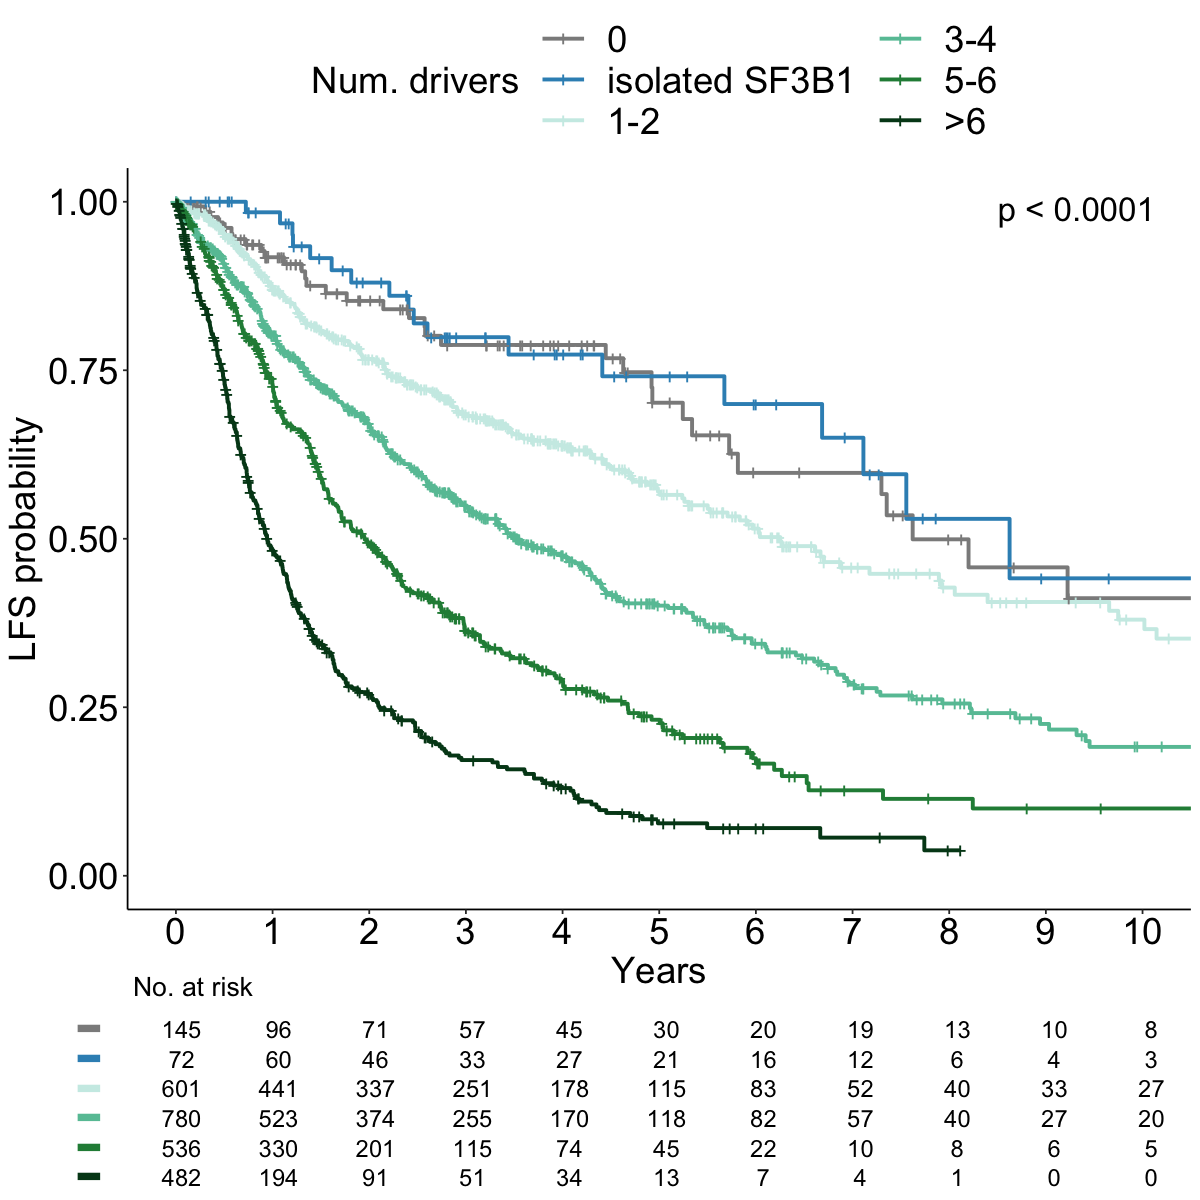

In [820]:
# LFS
look <- "range_driver3"
ff.free = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~",look))
km.free = survfit(ff.free ,data=aa) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub(paste0(look,"="),"",names(km.free$strata)))

gall.free <- ggsurvplot(km.free, data=aa, 
                   color=look,
                   legend.labs=myleg.free, 
                   legend.title="Num. drivers",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   palette=nncol,
                   risk.table=TRUE,
                   #tables.col="look", 
                   tables.y.text=FALSE,
                   risk.table.title="No. at risk",risk.table.fontsize=5
)
gfree <- gall.free$plot + theme_classic() + gtheme(22) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("LFS probability") + 
guides(color = guide_legend(override.aes = list(shape = NA))) + 
guides(color=guide_legend(nrow=3)) + 
theme(legend.key.size = unit(1.7, 'lines'))

gtable.free <- gall.free$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

options(repr.plot.width=10, repr.plot.height=10)
gfree2 <- ggarrange(gfree, gtable.free+theme(plot.margin = unit(c(-0.5, 0, 0, 1.6), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))
gfree2

# Figure 2

## Calculate IPSS-M 

The IPSS-M is already provided on the dataframe, with columns:
- *IPSSM*, for the IPSS-M categories
- *IPSSM_SCORE*, for the IPSS-M risk 

However, in this section, we re-calculate it, in order to illustrate how to do it!

In [821]:
path.file <- system.file("extdata", "IPSSMexample.csv", package = "ipssm") 
lala <- IPSSMread(path.file)
colnames(lala)

[1] "Did you make sure that the unit for Hemoglobin (HB) is g per dL."
[1] "Did you make sure that the unit for Platelets (PLT) is Giga per L."
[1] "Did you make sure that the unit for Bone Marrow Blast (BM_BLAST) is percentage."
[1] "Data successfully imported."


[1] "ID"         "HB"         "PLT"        "BM_BLAST"   "del5q"     
 [6] "del7_7q"    "complex"    "CYTO_IPSSR" "del17_17p"  "TP53mut"   
[11] "TP53maxvaf" "TP53loh"    "MLL_PTD"    "FLT3"       "ASXL1"     
[16] "BCOR"       "BCORL1"     "CBL"        "CEBPA"      "DNMT3A"    
[21] "ETV6"       "EZH2"       "IDH1"       "IDH2"       "KRAS"      
[26] "NF1"        "NPM1"       "NRAS"       "RUNX1"      "SETBP1"    
[31] "SF3B1"      "SRSF2"      "STAG2"      "U2AF1"      "ETNK1"     
[36] "GATA2"      "GNB1"       "PHF6"       "PPM1D"      "PRPF8"     
[41] "PTPN11"     "WT1"

In [822]:
# Preparing Input Data
tmp.ipssm <- dd
tmp.ipssm$del7_7q <- as.numeric(tmp.ipssm$del7 | tmp.ipssm$del7q)
tmp.ipssm$del17_17p <- as.numeric(tmp.ipssm$del17 | tmp.ipssm$del17p)
tmp.ipssm$complex <- car::recode(tmp.ipssm$complex, "'complex'='1'; 'non-complex'='0'")
tmp.ipssm$CYTO_IPSSR <- car::recode(tmp.ipssm$CYTO_IPSSR , "'Very-Good'='Very Good' ; 'Int'='Intermediate' ; 'Very-Poor'='Very Poor'")
tmp.ipssm$TP53mut <- as.vector(sapply(dd$ID, function(x) sum(maf$ID==x & maf$GENE=="TP53")))
tmp.ipssm$TP53mut <- car::recode(tmp.ipssm$TP53mut, " '2'='2 or more' ; '3'='2 or more' ")
tmp.ipssm$TP53loh <- 0 ; tmp.ipssm$TP53loh[which(tmp.ipssm$chr17%in%c("cnloh","del"))] <- 1
tmp.ipssm$TP53maxvaf <- NA 
tmp.ipssm$FLT3[which(tmp.ipssm$FLT3_ITD==1)] <- 1
tmp.ipssm <- tmp.ipssm[,colnames(lala)]

# Processing Inout
tmp.process <- IPSSMprocess(tmp.ipssm)
tmp.process[which(tmp.process$ID=="E-H-106249-T1-1-D1-1"),"TP53multi"] <- 0 # just one exeption - erverting back as del17p not at the TP53 locus
# Calculating the IPSSM
tmp.res <- IPSSMmain(tmp.process)

Pre-processing your input data...
Success
Calculating IPSS-M ...
Sucess


In [823]:
table(tmp.res$IPSSMcat_mean, dd$IPSSM) # we re-calculated the IPSS-M indeed

               
                High Low Moderate-High Moderate-Low Very-High Very-Low
  High           379   0             0            0         0        0
  Low              0 889             0            0         0        0
  Moderate High    0   0           281            0         0        0
  Moderate Low     0   0             0          302         0        0
  Very High        0   0             0            0       469        0
  Very Low         0   0             0            0         0      381

In [824]:
dd$SF3B1_5q <- tmp.res$SF3B1_5q
dd$SF3B1_alpha <- tmp.res$SF3B1_alpha
dd$IPSSM <- factor(dd$IPSSM, levels=c("Very-Low","Low","Moderate-Low","Moderate-High","High","Very-High"))
table(dd$IPSSM, exclude=F)
summary(dd$IPSSM_SCORE)


     Very-Low           Low  Moderate-Low Moderate-High          High 
          381           889           302           281           379 
    Very-High          <NA> 
          469           256 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-2.87000 -1.16000 -0.38000 -0.00806  0.91000  5.32000      256 

## Fig 2A

In [825]:
gcol <- rev(pal_jama()(5))
gcol <- gcol[c(1,5,3,4,2)]
ggcol <- c(gcol[1:3],pal_jama()(6)[6],gcol[4:5])

In [826]:
tmp = dd[!is.na(dd$IPSSM_SCORE),]
dens <- density(tmp$IPSSM_SCORE)
dens <- data.frame(x=dens$x, y=dens$y)

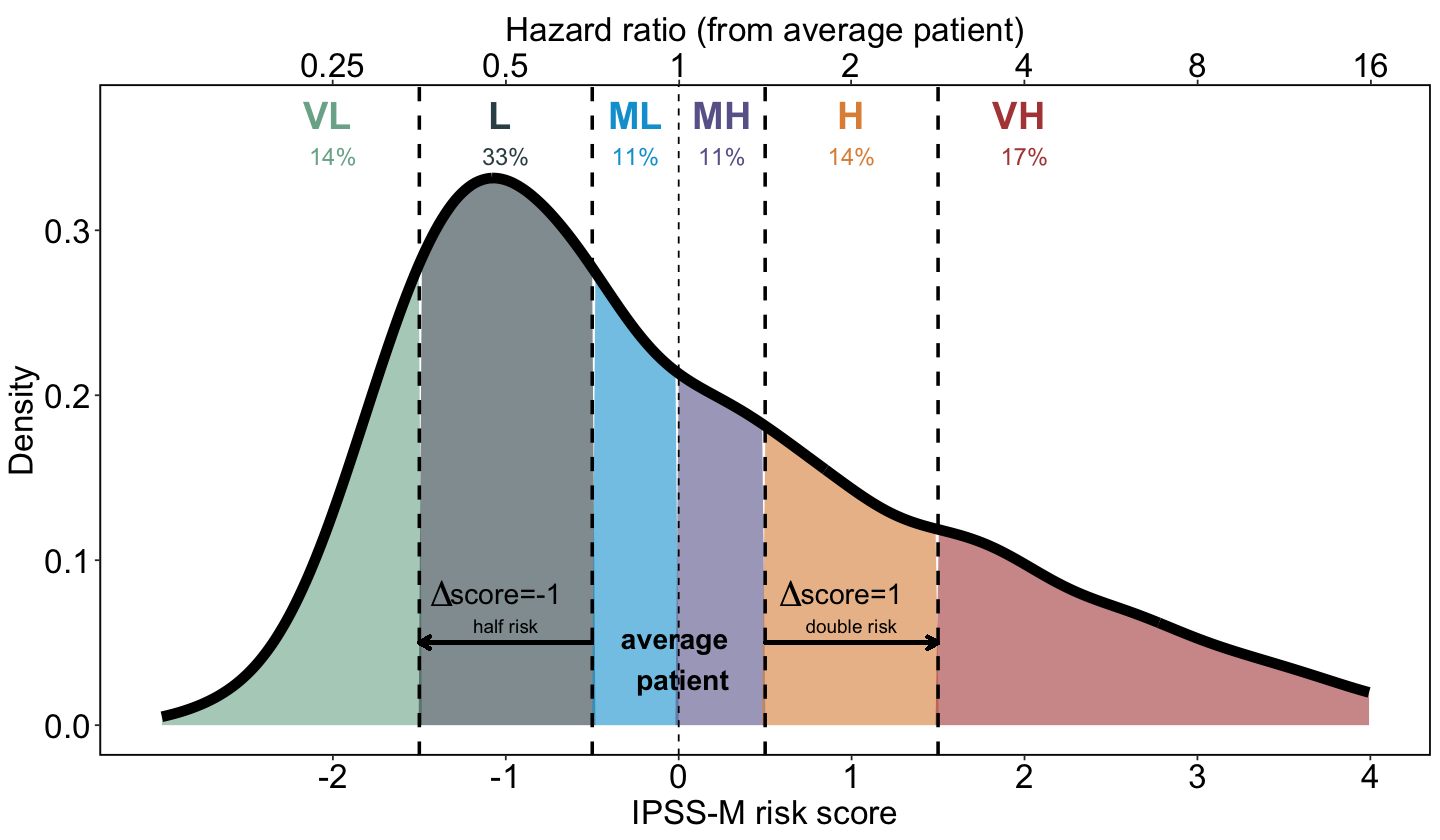

In [827]:
options(repr.plot.width=12, repr.plot.height=7)

cutpoints.center <- c(-1.5,-0.5,0,0.5,1.5)

gscore <- ggplot(dens, aes(x=x,y=y)) + 
theme_bw() +
theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_rect(colour = "black", size=1)) + 
gtheme(20) + 

# highlight the cutoff for categorization
geom_area(mapping = aes(x = x, y=ifelse( (x<=cutpoints.center[1]) , y, 0)), fill = ggcol[1], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[1]&x<=cutpoints.center[2]) , y, 0)), fill = ggcol[2], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[2]&x<=cutpoints.center[3]) , y, 0)), fill = ggcol[3], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[3]&x<=cutpoints.center[4]) , y, 0)), fill = ggcol[4], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[4]&x<=cutpoints.center[5]) , y, 0)), fill = ggcol[5], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[5]) , y, 0)), fill = ggcol[6], alpha=.6) +

geom_vline(xintercept = cutpoints.center[-3],col="black",linetype=2,size=1) + 
geom_vline(xintercept = cutpoints.center[3],col="black",linetype=2,size=.5) + 

# plot density
geom_line(size=3) + 
# scaling
scale_x_continuous(breaks=c(-2,-1,0,1,2,3,4),
                   limits = c(-3,4),
                   sec.axis = dup_axis(name="Hazard ratio (from average patient)", 
                                       labels=c(2^-2,2^-1,2^0,2^1,2^2,2^3,2^4))
) +
# labels
xlab("IPSS-M risk score") + ylab("Density") + ylim(c(0,.37)) +
# annotate category
annotate(geom="text",x=-2,y=.37,label=" VL  ",size=8,col=ggcol[1],fontface=2) +
annotate(geom="text",x=-2,y=.345,label="14%",size=5,col=ggcol[1]) +

annotate(geom="text",x=-1,y=.37,label=" L  ",size=8,col=ggcol[2],fontface=2) +
annotate(geom="text",x=-1,y=.345,label="33%",size=5,col=ggcol[2]) +

annotate(geom="text",x=-0.25,y=.37,label=" ML ",size=8,col=ggcol[3],fontface=2) +
annotate(geom="text",x=-0.25,y=.345,label="11%",size=5,col=ggcol[3]) +

annotate(geom="text",x=0.25,y=.37,label=" MH ",size=8,col=ggcol[4],fontface=2) +
annotate(geom="text",x=0.25,y=.345,label="11%",size=5,col=ggcol[4]) +

annotate(geom="text",x=1,y=.37,label=" H ",size=8,col=ggcol[5],fontface=2) +
annotate(geom="text",x=1,y=.345,label="14%",size=5,col=ggcol[5]) +

annotate(geom="text",x=2,y=.37,label=" VH  ",size=8,col=ggcol[6],fontface=2) +
annotate(geom="text",x=2,y=.345,label="17%",size=5,col=ggcol[6]) + 

# annotate interpretation
geom_segment(
    x = 0.5, y = 0.05,
    xend = 1.5, yend = 0.05,
    lineend = "round",linejoin = "round",
    size = 1, 
    arrow = arrow(length = unit(0.1, "inches")),
    colour = "black"
  ) + 
geom_segment(
    x = -0.5, y = 0.05,
    xend = -1.5, yend = 0.05,
    lineend = "round",linejoin = "round",
    size = 1, 
    arrow = arrow(length = unit(0.1, "inches")),
    colour = "black"
  ) + 
annotate(geom="text",x=0,y=.04,label="average \n patient",size=6,col="black", fontface=2) +

annotate(geom="text",x=.65,y=.08,label=c(expression(Delta),""),size=8,col="black")+
annotate(geom="text",x=1,y=.08,label="score=1",size=6,col="black")+
annotate(geom="text",x=1,y=.06,label="double risk",size=4,col="black")+

annotate(geom="text",x=-1.37,y=.08,label=c(expression(Delta),""),size=8,col="black")+
annotate(geom="text",x=-1,y=.08,label="score=-1",size=6,col="black")+
annotate(geom="text",x=-1,y=.06,label="half risk",size=4,col="black")

gscore

## Fig 2B

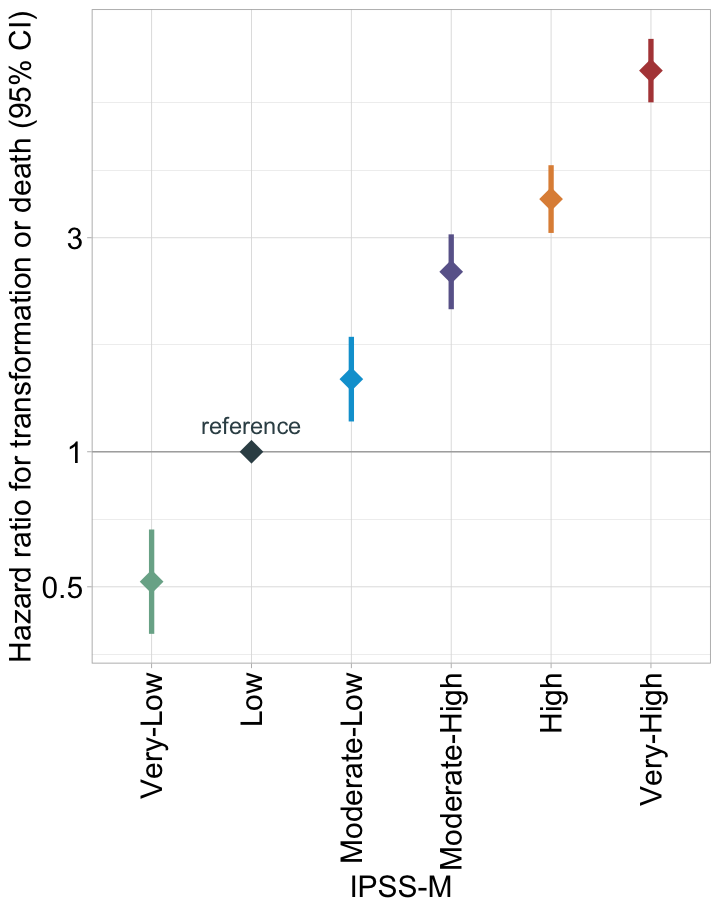

In [828]:
rr <- dd
rr$risk.cat <- factor(rr$IPSSM, levels=c("Low","Very-Low",levels(dd$IPSSM)[3:6])) # make Low the reference level

ff = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","risk.cat"))
c.iwg <- coxph(ff, data=rr) ; c.iwg.free <- c.iwg
zc <- as.data.frame( summary(c.iwg)$conf.int )[,c(1,3,4)] ; colnames(zc) <- c("HR","HRlow95","HRup95")
zc <- rbind(data.frame(HR=1,HRlow95=0,HRup95=0),zc)
zc$category <- levels(rr$risk.cat)
zc$category <- factor(zc$category, levels=levels(dd$IPSSM))
zc$endpoint <- "Leukemia-free survival"

options(repr.plot.width=6, repr.plot.height=7.6)

gvf <- ggplot(zc, aes(x=category,y=HR, ymin=HRlow95,ymax=HRup95,color=category)) +
geom_hline(yintercept=1,color="darkgrey",size=.4) +
geom_pointrange(size=1.5,position = position_dodge(width=.6),shape=18) +
scale_y_log10(breaks=c(0.5,1,3,10,30,100),labels=c(0.5,1,3,10,30,100)) + 
scale_color_manual(values=ggcol) +  scale_fill_manual(values=ggcol) +  
theme_light() + gtheme(18) + 
ylab("Hazard ratio for transformation or death (95% CI)") + xlab("IPSS-M") +
noleg +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
annotate("text",label="reference",x="Low",y=1.15,col=gcol[2],size=5)
gvf

## Fig 2C-2D

In [829]:
## KM CURVES
# LFS
ff.free = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","IPSSM"))
km.free = survfit(ff.free ,data=dd) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub("IPSSM=","",names(km.free$strata))," (",km.free$n,")")
# OS
ff.os = as.formula(paste("Surv(OS_YEARS,OS_STATUS)~","IPSSM"))
km.os = survfit(ff.os ,data=dd) ; km.os$call$formula <- ff.os
myleg.os = paste0(gsub("IPSSM=","",names(km.os$strata))," (",km.os$n,")")

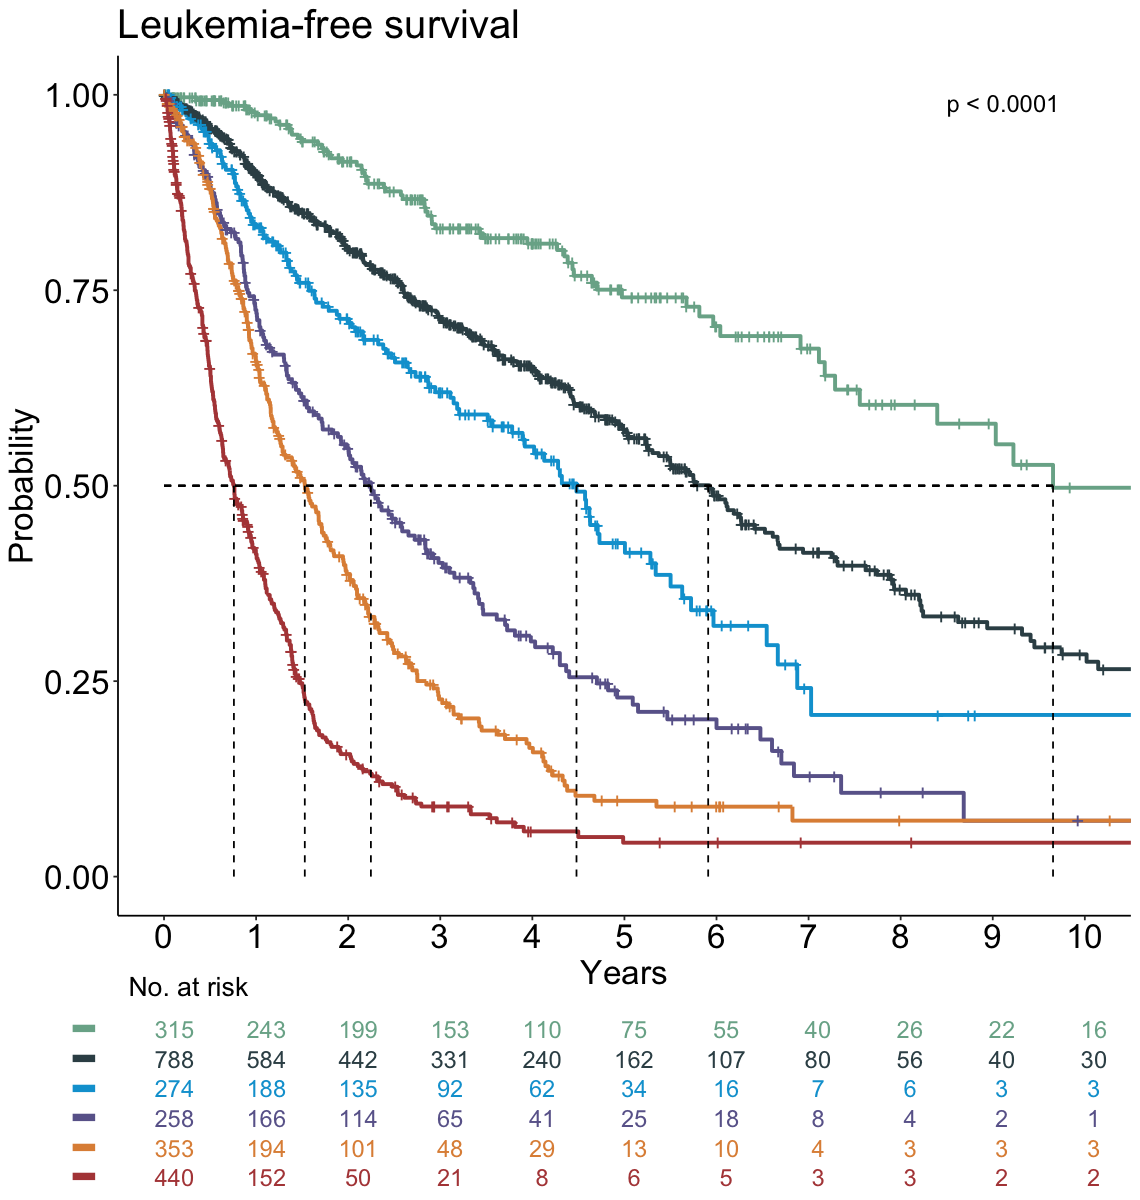

In [830]:
# LFS
gall.free <- ggsurvplot(km.free, data=dd, 
                   color="IPSSM", 
                   #legend.labs=myleg.free, 
                   legend.title="IPSS-M",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=5,
                   surv.median.line="hv",
                   palette=ggcol,
                   risk.table=TRUE,
                   tables.col="IPSSM", tables.y.text=FALSE,
                   risk.table.title="No. at risk",risk.table.fontsize=5,
                   title="Leukemia-free survival"
                  )
gfree <- gall.free$plot + theme_classic() + gtheme(20) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("Probability") + 
guides(color = guide_legend(override.aes = list(shape = NA)))

gtable.free <- gall.free$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

ggfree <- ggarrange(gfree+noleg, gtable.free+theme(plot.margin = unit(c(-0.5, 0, 0, 1.5), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))

options(repr.plot.width=9.5, repr.plot.height=10)
ggfree

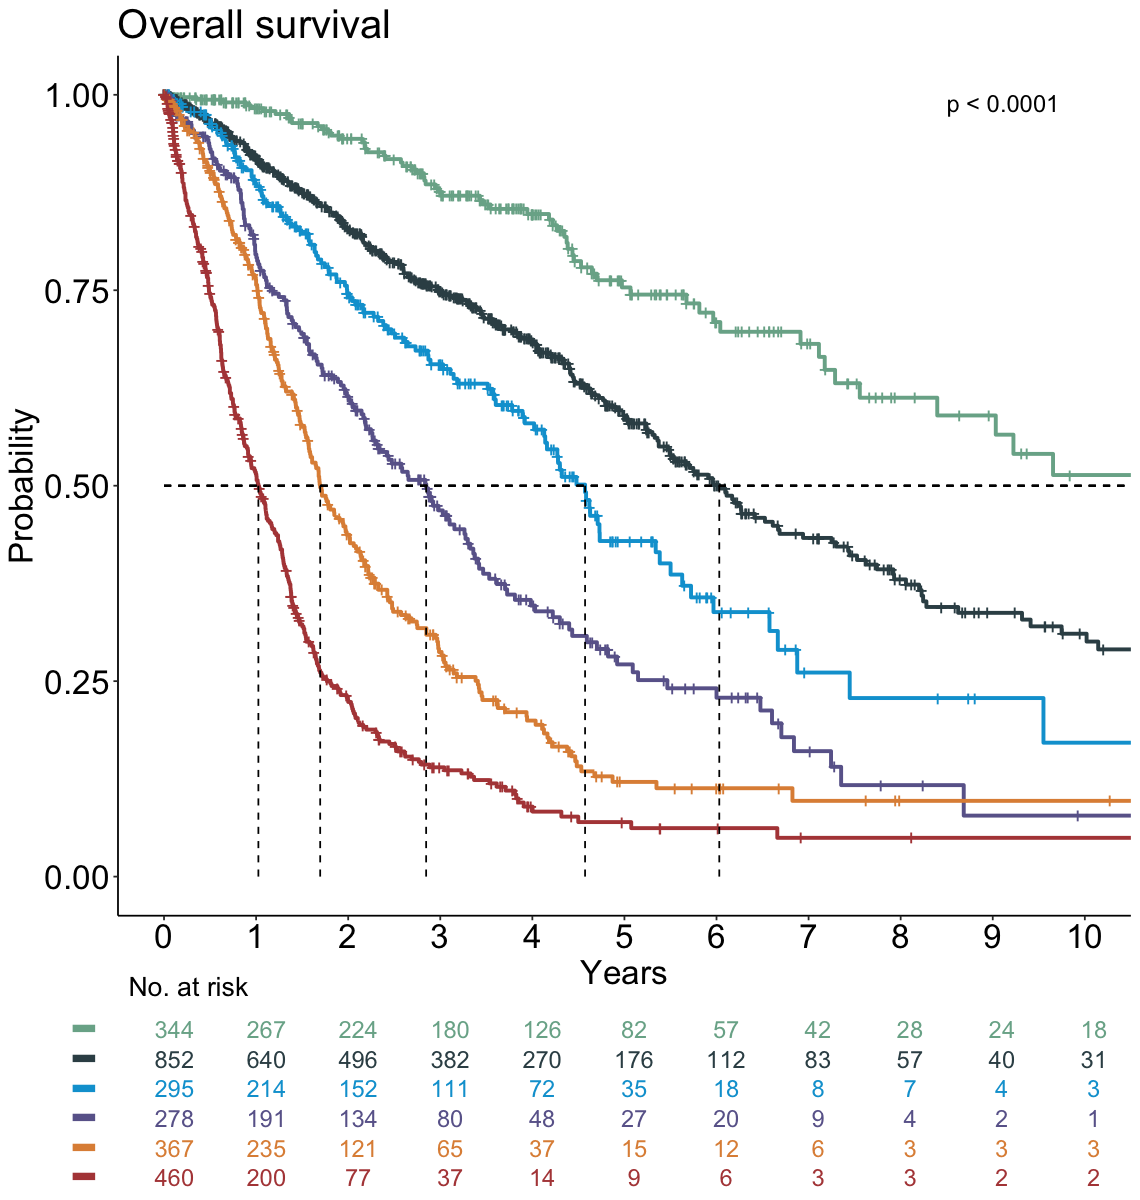

In [832]:
# OS
gall.os <- ggsurvplot(km.os, data=dd, 
                   color="IPSSM", 
                   #legend.labs=myleg.free, 
                   legend.title="IPSS-M",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=5,
                   surv.median.line="hv",
                   palette=ggcol,
                   risk.table=TRUE,
                   tables.col="IPSSM", tables.y.text=FALSE,
                   risk.table.title="No. at risk",risk.table.fontsize=5,
                   title="Overall survival"
                  )
gos <- gall.os$plot + theme_classic() + gtheme(20) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("Probability") + 
guides(color = guide_legend(override.aes = list(shape = NA)))

gtable.os <- gall.os$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

ggos <- ggarrange(gos+noleg, gtable.os+theme(plot.margin = unit(c(-0.5, 0, 0, 1.5), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))

options(repr.plot.width=9.5, repr.plot.height=10)
ggos

## Fig 2E

In [833]:
# Prepare for Competing Risk Analysis:
dd$comp_sample_years = pmin(dd$OS_YEARS, dd$AMLt_YEARS)
dd$comp_status = "censor"
dd$comp_status[which(dd$OS_STATUS==1)] = "death"
dd$comp_status[which(dd$AMLt_STATUS==1)] = "aml"
i <- which(is.na(dd$comp_sample_years) & !is.na(dd$comp_status))
dd$comp_status[i] <- NA
dd$comp_status = factor(dd$comp_status, levels=c("censor","aml","death"))
table(dd$comp_status,exclude=F)


censor    aml  death   <NA> 
  1264    409    936    348 

In [834]:
get_df_cif <- function(cmfit, vec.time=seq(0,6,0.05)) {
    fit <- timepoints(cmfit, vec.time)
    # estimates
    t.est <- as.data.frame(t(fit$est))
    t.est$time <- as.numeric(rownames(t.est))
    u.est.aml <- pivot_longer(data=t.est, cols=contains("aml"), names_to = "strata", values_to = "est_aml",)
    u.est.death <- pivot_longer(data=t.est, cols=contains("death"), names_to = "strata", values_to = "est_death",)
    # variance
    t.var <- as.data.frame(t(fit$var))
    t.var$time <- as.numeric(rownames(t.var))
    u.var.aml <- pivot_longer(data=t.var, cols=contains("aml"), names_to = "strata", values_to = "var_aml",)
    u.var.death <- pivot_longer(data=t.var, cols=contains("death"), names_to = "strata", values_to = "var_death",)

    # build df
    df <- cbind( u.est.aml[,c("time","est_aml","strata")] , u.est.death[,c("est_death")] ,
                 u.var.aml[,c("var_aml")] ,  u.var.death[,c("var_death")]
               )
    df$strata <- gsub(" death","",gsub(" aml","",df$strata) )

    df$lower_aml <- df$est_aml - 1.96*sqrt(df$var_aml)
    df$upper_aml <- df$est_aml + 1.96*sqrt(df$var_aml)
    
    df$lower_death <- df$est_death - 1.96*sqrt(df$var_death)
    df$upper_death <- df$est_death + 1.96*sqrt(df$var_death)
    
    return(df)
}

In [835]:
# CAUSE DEATH WITH AML || DEATH WITHOUT AML
tmp <- dd
# CAUSE SPECIFIC: AML-t || DEATH WITHOUT AML
tmp$status1 <- car::recode(as.vector(tmp$comp_status),"'death'='death_without'")
tmp$time1 <- tmp$comp_sample_years
# CAUSE SPECIFIC: DEATH WITH AML || DEATH WITHOUT AML
tmp$status2 <-  "censor"
tmp$status2[tmp$OS_STATUS==1 & tmp$AMLt_STATUS==1] <- "d_with_aml" # death with aml
tmp$status2[tmp$OS_STATUS==1 & tmp$AMLt_STATUS==0] <- "death_without" # death without aml
tmp$time2 <- tmp$OS_YEARS
i <- which( is.na(tmp$AMLt_YEARS) | is.na(tmp$AMLt_STATUS) )
tmp$time2[i] <- NA ; tmp$status2[i] <- NA
tmp$status2[which(is.na(tmp$time2))] <- NA

table(tmp$status1, tmp$status2,exclude=F)

               
                censor d_with_aml death_without <NA>
  aml               62        347             0    0
  censor          1264          0             0    0
  death_without      0          0           936    0
  <NA>               0          0             0  348

In [836]:
cmfit1 = with(tmp,cuminc(time1,status1,IPSSM,cencode="censor"))
rr1 = get_df_cif(cmfit=cmfit1, vec.time = seq(0, 10, 0.05))
colnames(rr1) <- gsub("death","death_without",colnames(rr1))

cmfit2 = with(tmp,cuminc(time2,status2,IPSSM,cencode="censor"))
rr2 = get_df_cif(cmfit=cmfit2, vec.time = seq(0, 10, 0.05))
colnames(rr2) <- gsub("death","death_without",colnames(rr2))
colnames(rr2) <- gsub("aml","death_with",colnames(rr2))

rr3 <- cbind(rr1, rr2[,colnames(rr2)[!grepl("out",colnames(rr2))&grepl("death_with",colnames(rr2))]])
rr3$est_minus_os <- rr3$est_death_with + rr3$est_death_without
rr3$est_minus_lfs <- rr3$est_aml + rr3$est_death_without

536 cases omitted due to missing values
536 cases omitted due to missing values


In [837]:
rr3.long <- pivot_longer(rr3[,c("time","strata",colnames(rr3)[grepl("est",colnames(rr3))])], 
                         cols = starts_with("est"))
rr3.long$strata <- factor(rr3.long$strata, levels=levels(tmp$IPSSM))
rr3.long$name <- factor(rr3.long$name, 
                        levels=c("est_aml","est_death_with","est_death_without","est_minus_os","est_minus_lfs"))

In [838]:
casatt <- met.brewer("Cassatt2")
col.fig2e <- c(casatt[1],casatt[3],casatt[7],casatt[8],casatt[10])

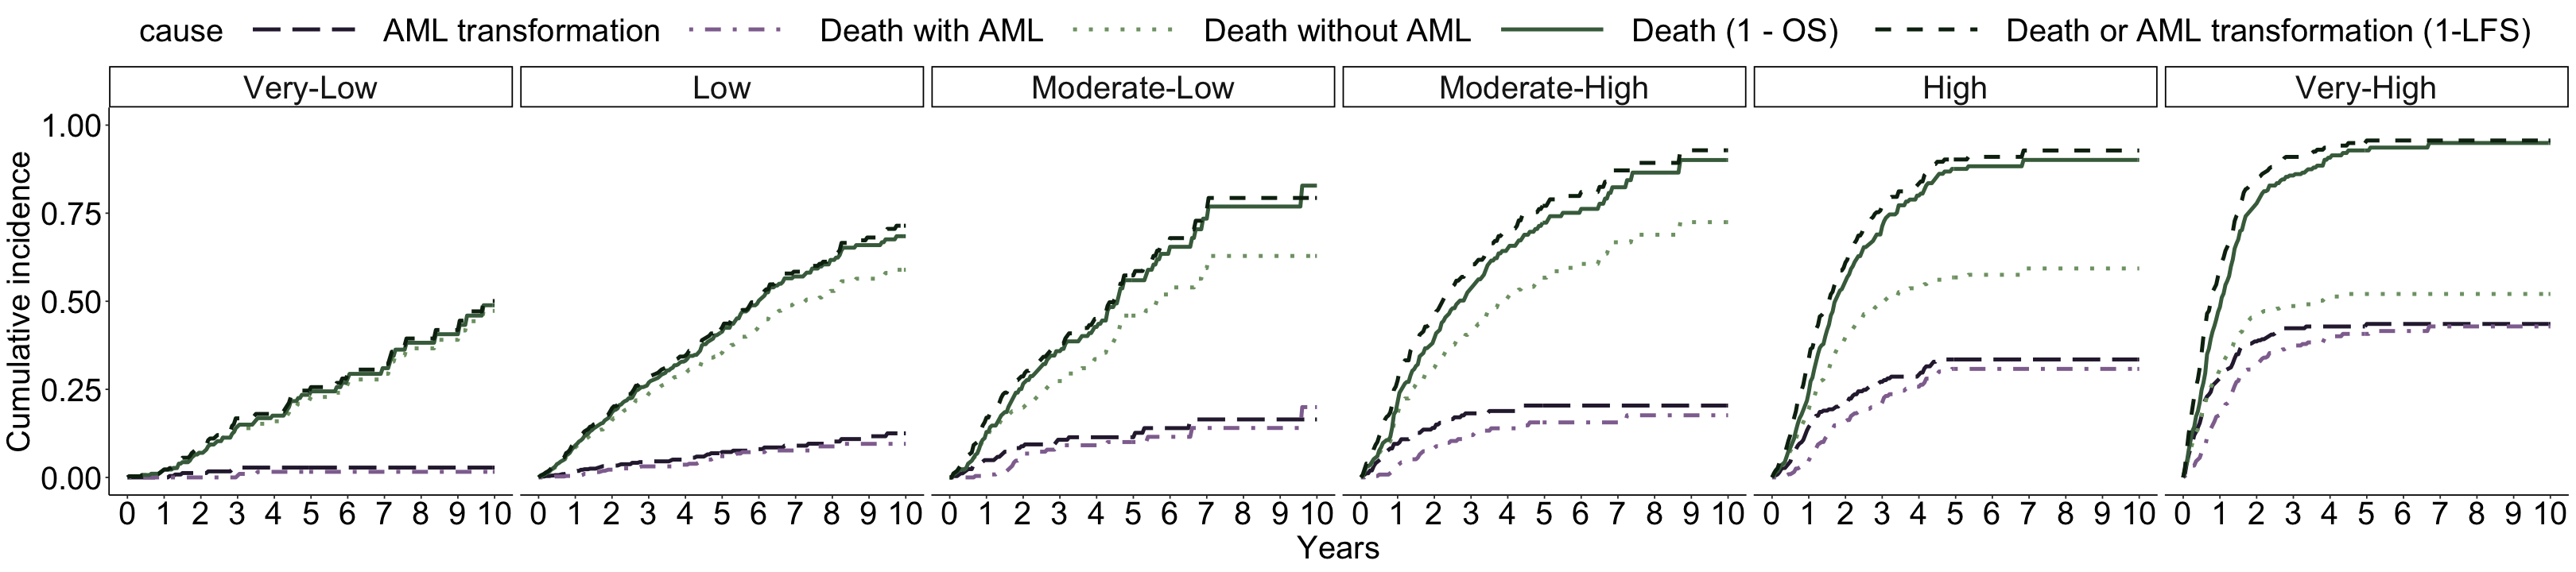

In [839]:
options(repr.plot.width=27, repr.plot.height=6)

gcif2e <- ggplot(data = rr3.long, aes(x = time, y = value, linetype = name, color=name)) +
       geom_line(size=1.4) +  
       scale_x_continuous(breaks=0:10) + ylim(c(0,1)) + 
theme_classic() + gtheme(24) + topleg + 
xlab("Years") + ylab("Cumulative incidence") + facet_grid(.~strata)  +
scale_color_manual(values=col.fig2e,
                   name="cause",
                   labels=c("AML transformation","Death with AML","Death without AML",
                            "Death (1 - OS)","Death or AML transformation (1-LFS)")) +
scale_linetype_manual(values=c("longdash","dotdash","dotted"
                               ,"solid","dashed"),
                   name="cause",
                   labels=c("AML transformation","Death with AML","Death without AML",
                            "Death (1 - OS)","Death or AML transformation (1-LFS)")) +
theme(legend.key.width = unit(3.4,"cm"))

gcif2e 

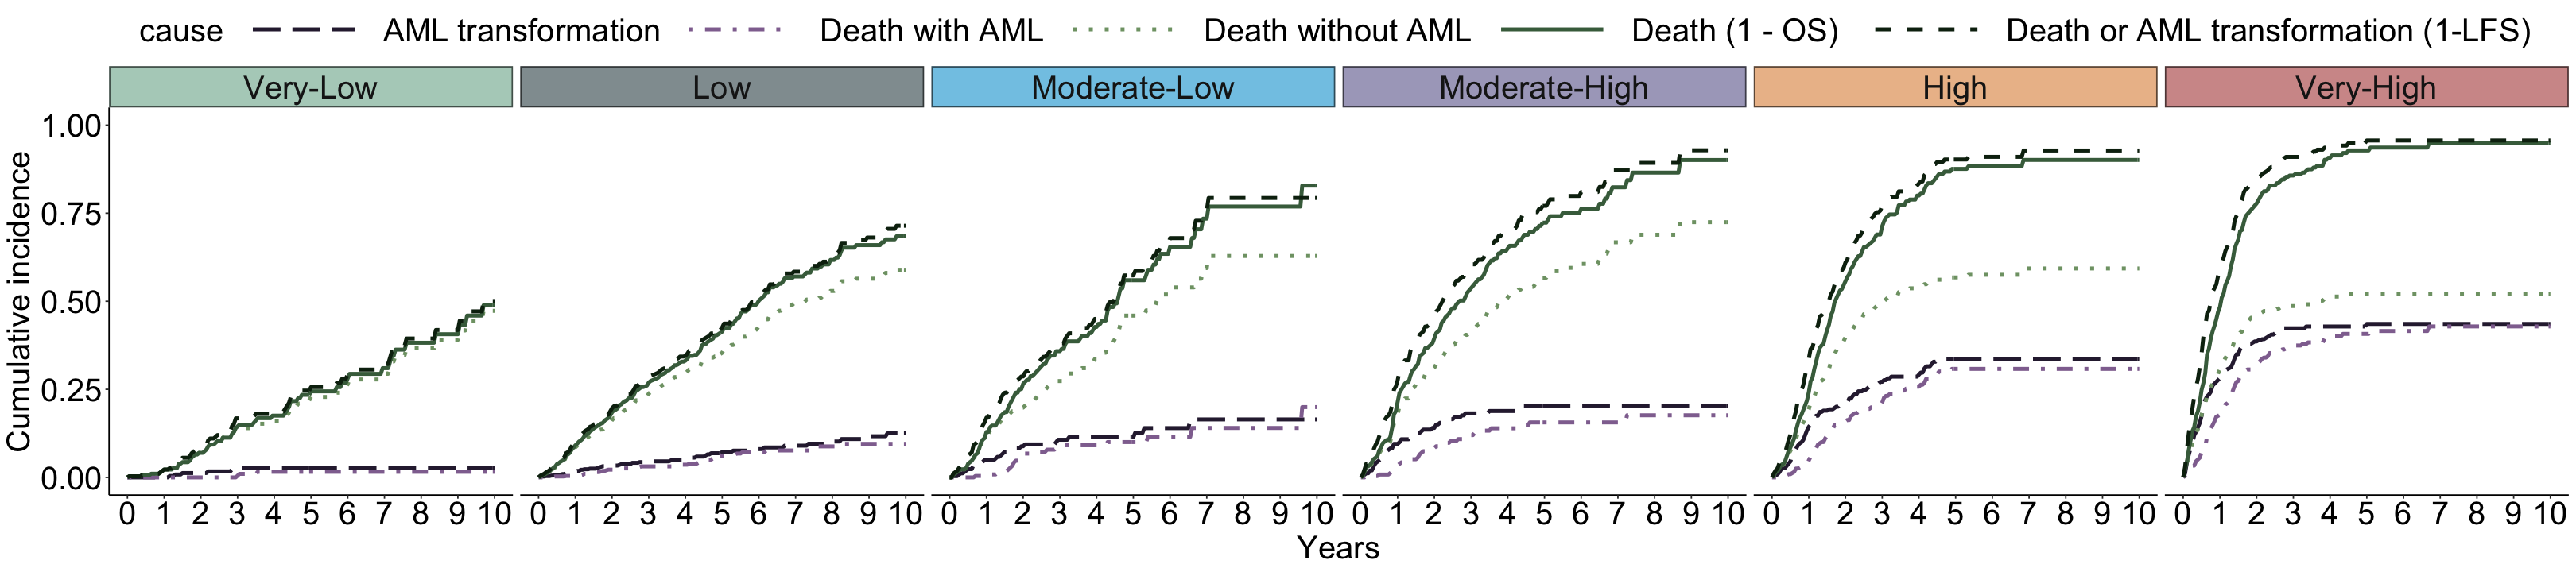

In [840]:
g <- ggplot_gtable(ggplot_build(gcif2e))
strips <- which(grepl('strip-', g$layout$name))
pal <- brewer.pal(8, "Paired")
for (i in seq_along(strips)) {
  k <- which(grepl('rect', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  #l <- which(grepl('titleGrob', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  g$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$fill <- ggcol[i]
  g$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$alpha <- .6
}
plot(g)

# Figure 3

## Fig 3A

In [841]:
getCI <- function(time, status, myscore, mydf) {
    ff <- as.formula(paste("Surv(",time,",",status,")~",myscore))
    res <- survConcordance(ff, data=mydf)
    return(list(ci=res$concordance, se=res$std.err))
}

In [842]:
ww <- dd
ww$vcat <- as.numeric(car:::recode(ww$IPSSM,
                "'Very-Low'='0'; 'Low'='1'; 
                'Moderate-Low'='2'; 
                'Moderate-High'='2'; 
                'High'='3'; 'Very-High'='4'"))
ww$icat <- as.numeric(car:::recode(ww$IPSSR,
                "'Very-Low'='0'; 'Low'='1'; 
                'Int'='2'; 
                'High'='3'; 'Very-High'='4'"))

ww.active <- ww[!is.na(ww$IPSSM_SCORE) & !is.na(ww$IPSSR_SCORE),]

In [843]:
# IPSS-M SCORE
# TRAIN
ci.train.free.sample <- getCI(time="LFS_YEARS", status="LFS_STATUS", myscore="IPSSM_SCORE", mydf=ww.active)
ci.train.os.sample <- getCI(time="OS_YEARS", status="OS_STATUS", myscore="IPSSM_SCORE", mydf=ww.active)
ci.train.aml.sample <- getCI(time="AMLt_YEARS", status="AMLt_STATUS", myscore="IPSSM_SCORE", mydf=ww.active)

dci.mol.score <- data.frame(
CI=c(
    ci.train.free.sample$ci,ci.train.os.sample$ci,ci.train.aml.sample$ci
),
se=c(
    ci.train.free.sample$se,ci.train.os.sample$se,ci.train.aml.sample$se
),
endpoint=rep(c("Leukemia-free survival","Overall survival","Leukemic transformation"),each=1)
)
dci.mol.score$model <- "IPSS-M"
dci.mol.score$type <- "score"

In [844]:
# IPSS-R SCORE
# TRAIN
ci.train.free.sample <- getCI(time="LFS_YEARS", status="LFS_STATUS", myscore="IPSSR_SCORE", mydf=ww.active)
ci.train.os.sample <- getCI(time="OS_YEARS", status="OS_STATUS", myscore="IPSSR_SCORE", mydf=ww.active)
ci.train.aml.sample <- getCI(time="AMLt_YEARS", status="AMLt_STATUS", myscore="IPSSR_SCORE", mydf=ww.active)

dci.ipss.score <- data.frame(
CI=c(
    ci.train.free.sample$ci,ci.train.os.sample$ci,ci.train.aml.sample$ci
),
se=c(
    ci.train.free.sample$se,ci.train.os.sample$se,ci.train.aml.sample$se
),
endpoint=rep(c("Leukemia-free survival","Overall survival","Leukemic transformation"),each=1)
)
dci.ipss.score$model <- "IPSS-R"
dci.ipss.score$type <- "score"

In [846]:
# IPSS-M CAT
# TRAIN
ci.train.free.sample <- getCI(time="LFS_YEARS", status="LFS_STATUS", myscore="vcat", mydf=ww.active)
ci.train.os.sample <- getCI(time="OS_YEARS", status="OS_STATUS", myscore="vcat", mydf=ww.active)
ci.train.aml.sample <- getCI(time="AMLt_YEARS", status="AMLt_STATUS", myscore="vcat", mydf=ww.active)

dci.mol.cat <- data.frame(
CI=c(
    ci.train.free.sample$ci,ci.train.os.sample$ci,ci.train.aml.sample$ci
),
se=c(
    ci.train.free.sample$se,ci.train.os.sample$se,ci.train.aml.sample$se
),
endpoint=rep(c("Leukemia-free survival","Overall survival","Leukemic transformation"),each=1)
)
dci.mol.cat$model <- "IPSS-M"
dci.mol.cat$type <- "category"

In [847]:
# IPSS-R CAT
# TRAIN
ci.train.free.sample <- getCI(time="LFS_YEARS", status="LFS_STATUS", myscore="icat", mydf=ww.active)
ci.train.os.sample <- getCI(time="OS_YEARS", status="OS_STATUS", myscore="icat", mydf=ww.active)
ci.train.aml.sample <- getCI(time="AMLt_YEARS", status="AMLt_STATUS", myscore="icat", mydf=ww.active)

dci.ipss.cat <- data.frame(
CI=c(
    ci.train.free.sample$ci,ci.train.os.sample$ci,ci.train.aml.sample$ci
),
se=c(
    ci.train.free.sample$se,ci.train.os.sample$se,ci.train.aml.sample$se
),
endpoint=rep(c("Leukemia-free survival","Overall survival","Leukemic transformation"),each=1)
)
dci.ipss.cat$model <- "IPSS-R"
dci.ipss.cat$type <- "category"

In [848]:
dci <- rbind(dci.mol.score, dci.mol.cat,
             dci.ipss.score, dci.ipss.cat
            )
dci$model <- factor(dci$model, levels=c("IPSS-R","IPSS-M"))
dci$endpoint <- factor(dci$endpoint, levels=c("Leukemia-free survival","Overall survival","Leukemic transformation"))

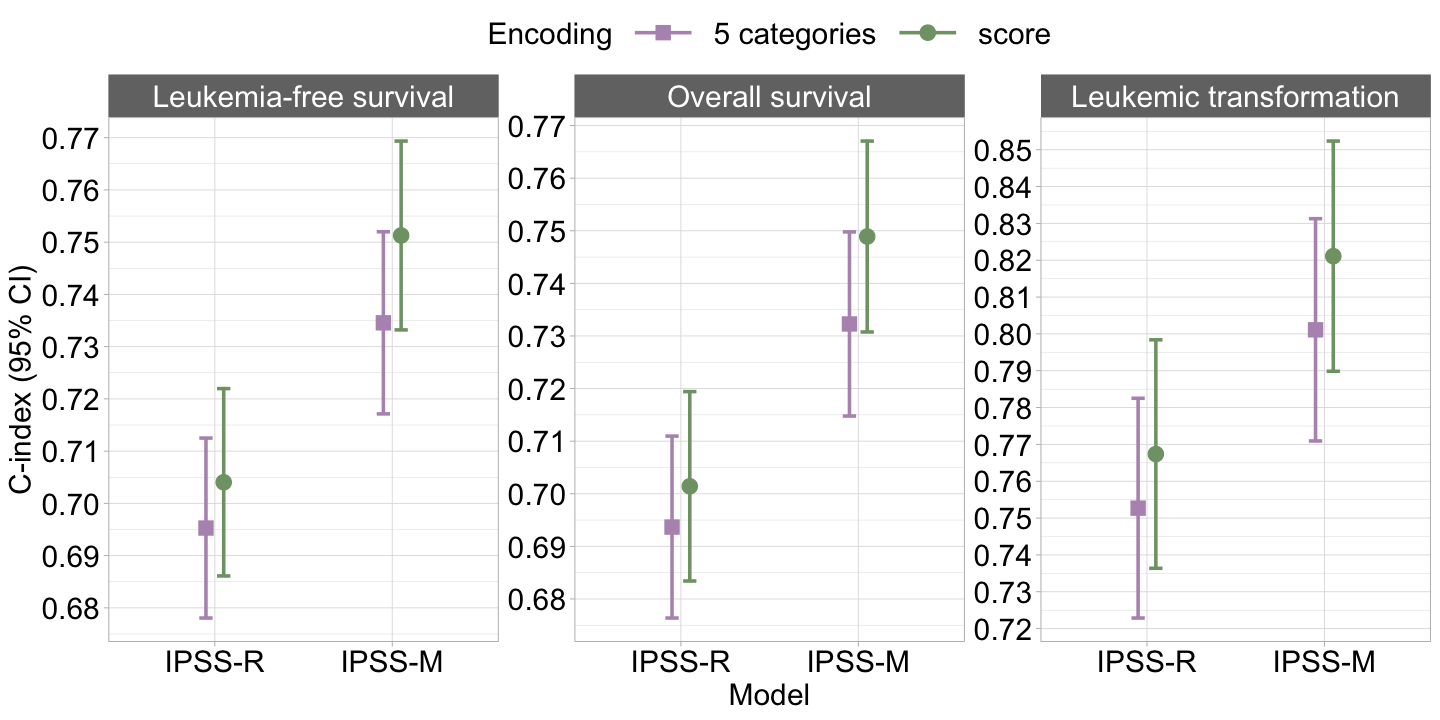

In [849]:
col.fig3a <- met.brewer("Cassatt2")[c(4,7)]

ggci <- ggplot(dci, aes(x=model,y=CI,color=type,shape=type)) + 
geom_point(stat="identity",size=4,position=position_dodge(width=0.2)) + 
geom_errorbar(aes(ymin=CI-1.96*se,ymax=CI+1.96*se),width=0.15,position=position_dodge(width=0.2),size=1) + 
#scale_y_continuous(limits=c(.68,.81),breaks = seq(.68,.81,0.01)) + 
scale_y_continuous(breaks = seq(.6,.85,0.01)) + 
theme_light() + gtheme(18) + 
xlab("Model") + ylab("C-index (95% CI)") +
scale_color_manual(values=col.fig3a,name="Encoding", labels=c("5 categories","score")) + 
scale_shape_manual(values=c(15,19),name="Encoding", labels=c("5 categories","score")) + 
topleg + 
facet_wrap(.~endpoint, scales="free_y") + 
theme(strip.background =element_rect(fill="grey45")) +
theme(strip.text = element_text(colour = 'white')) + 
theme(legend.key.width = unit(1.5,"cm"))

options(repr.plot.width=12, repr.plot.height=6)
ggci

## Fig 3B

In [850]:
aa <- dd[!is.na(dd$IPSSR) & !is.na(dd$IPSSM),]
nrow(aa)

ta <- table(aa$IPSSR)
aa$IPSSR4 <- paste0(aa$IPSSR," (", ta[aa$IPSSR], ")")
tl <- sort(unique(aa$IPSSR4))[c(5,3,2,1,4)]
sort(unique(aa$IPSSR4))
aa$IPSSR4 <- factor(aa$IPSSR4,levels=tl)

[1] 2678

[1] "High (348)"      "Int (551)"       "Low (1037)"      "Very-High (263)"
[5] "Very-Low (479)"

In [851]:
t <- table(aa$IPSSR, aa$IPSSM)
t

           
            Very-Low Low Moderate-Low Moderate-High High Very-High
  Very-Low       261 187           15            10    6         0
  Low            115 597          141            94   78        12
  Int              4  91          130           121  142        63
  High             0   4           15            49  117       163
  Very-High        0   0            0             4   30       229

In [852]:
aa$tmp.cat <- as.vector(aa$IPSSM)
aa$tmp.cat[aa$tmp.cat%in%c("Moderate-Low","Moderate-High")] <- "Int"
aa$tmp.cat <- factor(aa$tmp.cat, levels=levels(aa$IPSSR))

In [853]:
tr <- table(aa$IPSSR, aa$tmp.cat)
ttr <- tr # for re-stratification
diag(ttr) <- 0
hhr <- ttr # f
ttr

           
            Very-Low Low Int High Very-High
  Very-Low         0 187  25    6         0
  Low            115   0 235   78        12
  Int              4  91   0  142        63
  High             0   4  64    0       163
  Very-High        0   0   4   30         0

In [854]:
tr <- table(aa$IPSSR, aa$tmp.cat)
ttr <- tr # for re-stratification
diag(ttr) <- 0
hhr <- ttr # for re-stratification with shift > 1
hhr["Very-Low","Low"] <- 0
hhr["Low","Very-Low"] <- 0
hhr["Low","Int"] <- 0
hhr["Int","Low"] <- 0
hhr["Int","High"] <- 0
hhr["High","Int"] <- 0
hhr["High","Very-High"] <- 0
hhr["Very-High","High"] <- 0
ttr.upstage <- ttr
ttr.upstage[lower.tri(ttr.upstage)] <- 0
ttr.downstage <- ttr
ttr.downstage[upper.tri(ttr.downstage)] <- 0

hhr.upstage <- hhr
hhr.upstage["Int","Very-Low"] <- 0
hhr.upstage["High","Low"] <- 0
hhr.upstage["Very-High","Int"] <- 0

hhr.downstage <- hhr
hhr.downstage["Very-Low","Int"] <- 0
hhr.downstage["Very-Low","High"] <- 0
hhr.downstage["Low","High"] <- 0
hhr.downstage["Low","Very-High"] <- 0
hhr.downstage["Int","Very-High"] <- 0

In [855]:
hr <- data.frame(IPSSR=levels(aa$IPSSR),
                 IPSSR4=levels(aa$IPSSR4),
                 reclassify_percent = 100*apply(ttr,1,sum)/apply(tr,1,sum),
                 reclassify_down_percent = 100*apply(ttr.downstage,1,sum)/apply(tr,1,sum),
                 reclassify_up_percent = 100*apply(ttr.upstage,1,sum)/apply(tr,1,sum),
                 reclassify_n = apply(ttr,1,sum),
                 reclassify_high_percent = 100*apply(hhr,1,sum)/apply(tr,1,sum),
                 reclassify_high_down_percent = 100*apply(hhr.downstage,1,sum)/apply(tr,1,sum),
                 reclassify_high_up_percent = 100*apply(hhr.upstage,1,sum)/apply(tr,1,sum),
                 reclassify_high_n = apply(hhr,1,sum)
                )
hr$IPSSR <- factor(hr$IPSSR, levels=hr$IPSSR)

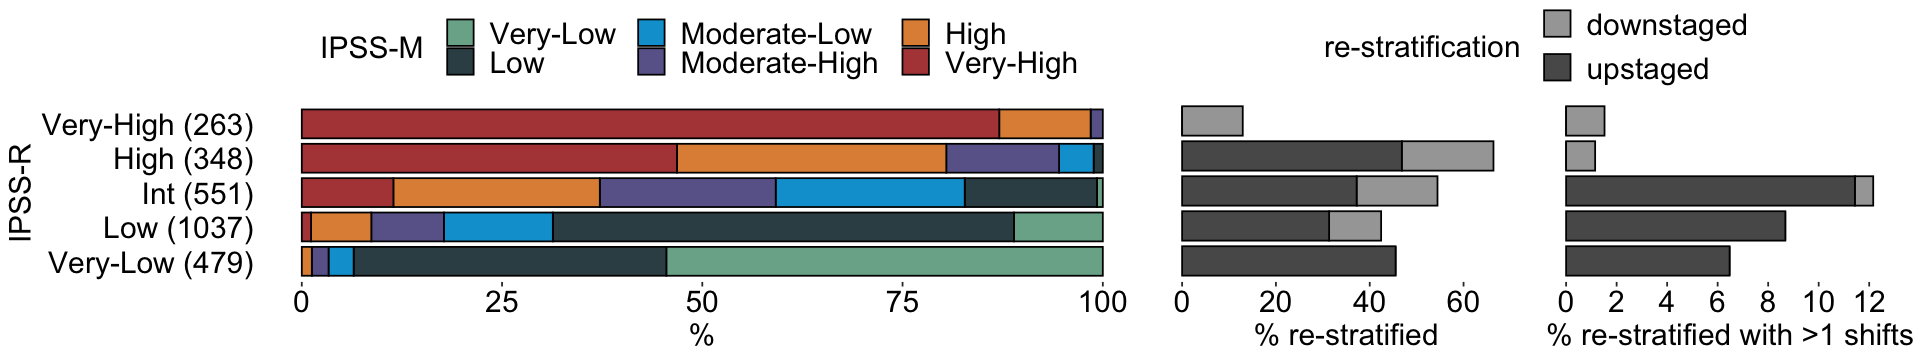

In [856]:
q1 <- ggplot(aa,aes(fill=IPSSM,x=IPSSR4)) + 
geom_bar(position="fill", color="black",width=.84) + 
theme_classic() + gtheme(18) + theme(axis.line=element_blank(), axis.ticks.y = element_blank()) +
topleg +
scale_fill_manual(name="IPSS-M", values=ggcol) + 
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
xlab("IPSS-R") + ylab("%") + coord_flip()

hr1 <- hr[,c("IPSSR","reclassify_down_percent")]
colnames(hr1) <- c("IPSSR","rr")  
hr1$type <- "downstaged"
hr2 <- hr[,c("IPSSR","reclassify_up_percent")]
colnames(hr2) <- c("IPSSR","rr")  
hr2$type <- "upstaged"
hr12 <- rbind(hr1,hr2)

qq2 <- ggplot(hr12,aes(y=rr,x=IPSSR,fill=type)) + 
geom_bar(stat="identity",color="black",width=.84) +
theme_classic() + gtheme(18) + theme(axis.line=element_blank(), axis.ticks.y = element_blank()) +
scale_fill_manual(name="re-stratification", values=c("grey65","grey35")) + 
guides(fill=guide_legend(nrow=2,byrow=TRUE)) +
topleg + 
scale_y_continuous(breaks=seq(0,80,20),limits=c(0,70)) + 
noytitle + noylabel + ylab("% re-stratified") + coord_flip()
#qq2


hhr1 <- hr[,c("IPSSR","reclassify_high_down_percent")]
colnames(hhr1) <- c("IPSSR","rr")  
hhr1$type <- "downstaged"
hhr2 <- hr[,c("IPSSR","reclassify_high_up_percent")]
colnames(hhr2) <- c("IPSSR","rr")  
hhr2$type <- "upstaged"
hhr12 <- rbind(hhr1,hhr2)

qq3 <- ggplot(hhr12,aes(y=rr,x=IPSSR,fill=type)) + 
geom_bar(stat="identity",color="black",width=.84) +
theme_classic() + gtheme(18) + theme(axis.line=element_blank(), axis.ticks.y = element_blank()) +
scale_fill_manual(name="re-stratification", values=c("grey65","grey35")) + 
guides(fill=guide_legend(nrow=2,byrow=TRUE)) +
topleg + 
scale_y_continuous(breaks=seq(0,12,2),limits=c(0,13)) + 
noytitle + noylabel + ylab("% re-stratified with >1 shifts") + coord_flip()
#qq3

options(repr.plot.width=16, repr.plot.height=3)
gre <- ggarrange(q1,ggarrange(qq2,qq3,common.legend=T),
          widths=c(3,2),ncol=2)
gre

We also show the KM stratified by IPSS-M per IPSS-R strata, and vice-versa, below:

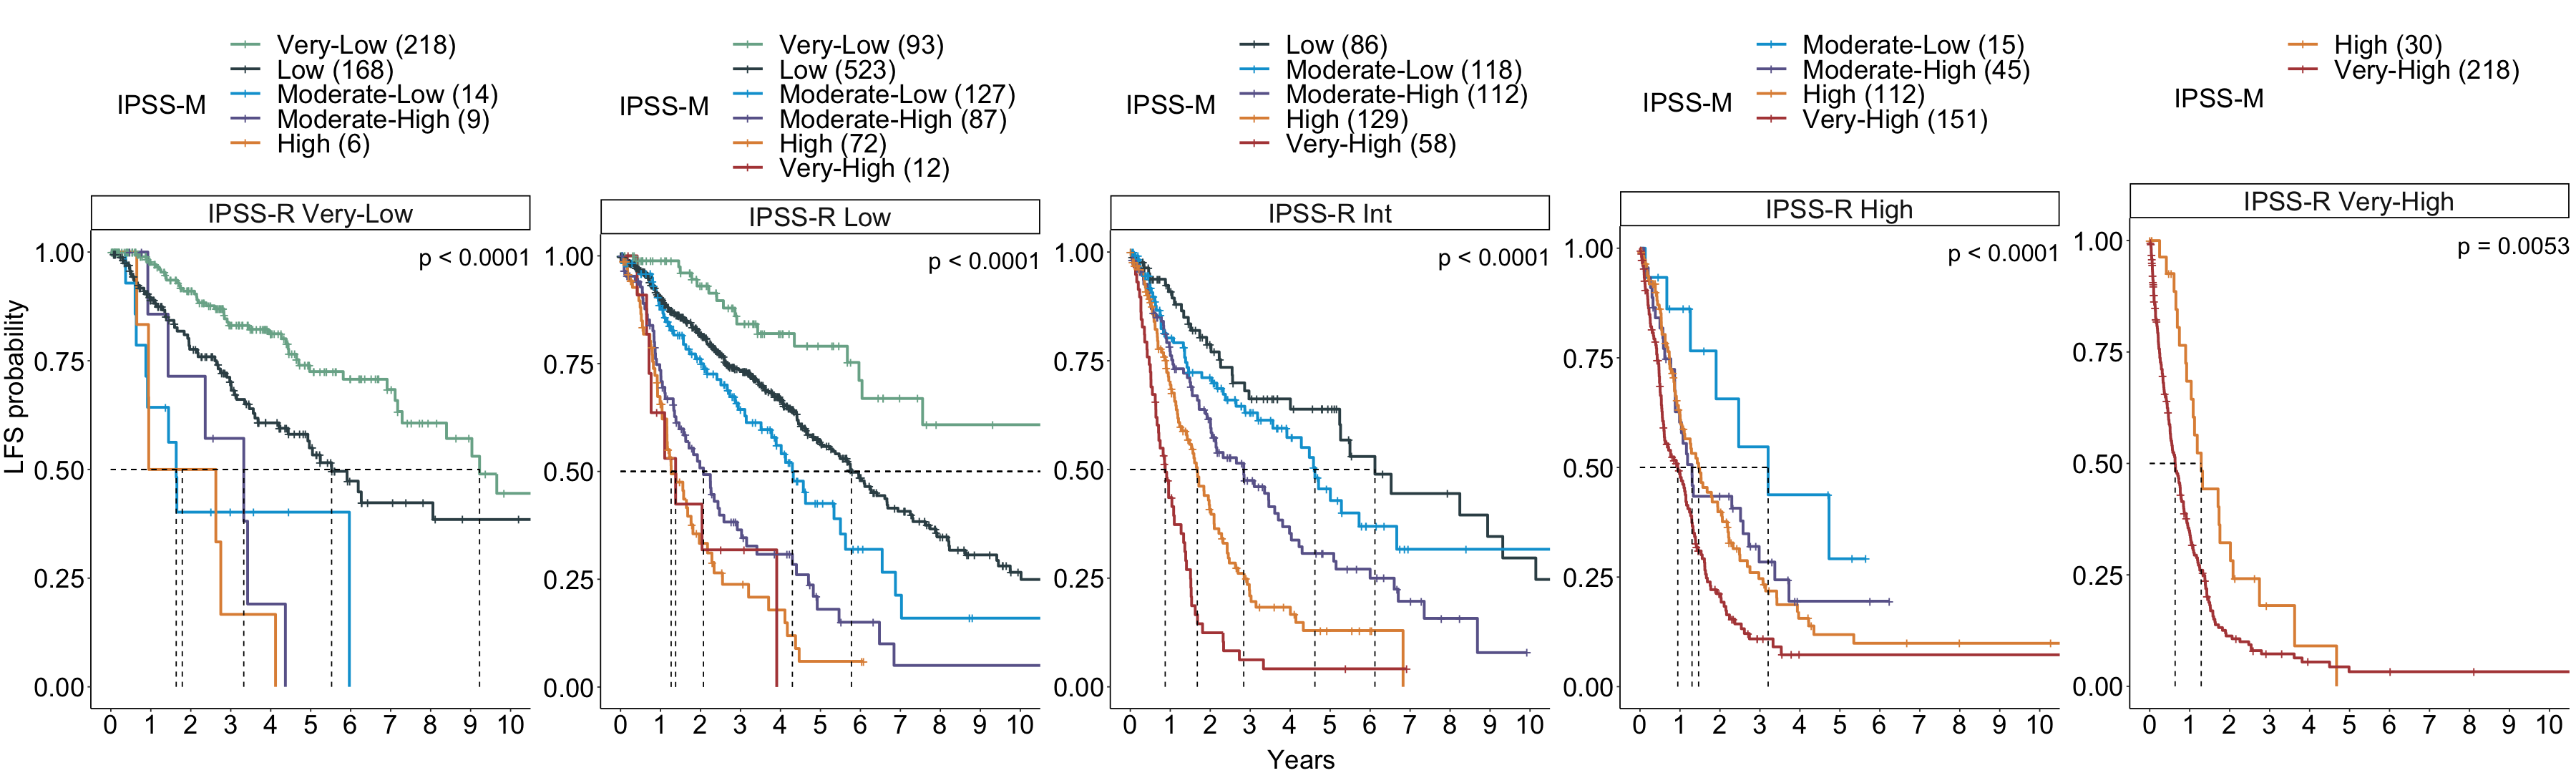

In [857]:
listg1 <- lapply( levels(aa$IPSSR) , function(cc) {
    
    hmp <- aa[which(aa$IPSSR==cc),]
    
    t <- table(hmp$IPSSM)
    cckeep <- names(t)[which(t>5)]
    hmp <- hmp[hmp$IPSSM%in%cckeep,]
    hmp$IPSSM <- factor(hmp$IPSSM, levels=cckeep)
    
    ff = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","IPSSM"))
    kmfit = survfit(ff,data=hmp)
    kmfit$call$formula <- ff
    myleg = paste0(gsub("IPSSM=","",names(kmfit$strata))," (",kmfit$n,")")
    
    g <- ggsurvplot(kmfit, data=hmp, 
                   color="IPSSM", 
                   legend.labs=myleg, 
                   legend.title="IPSS-M",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(7.7, 0.99), pval.size=7,
                   surv.median.line="hv",
                  )$plot + 
    theme_classic() + gtheme(22) + topleg + 
    theme(legend.key.width = unit(1.1,"cm")) + 
    facet_grid(.~paste("IPSS-R",cc)) + 
    scale_color_manual(name="IPSS-M", values=ggcol[which(t>5)]) + 
    noxtitle + noytitle + guides(color=guide_legend(nrow=2)) + 
    guides(color = guide_legend(override.aes = list(shape = NA))) + 
    guides(color=guide_legend(nrow=6, ))
    
    return(g)
    
    }
)

options(repr.plot.width=30, repr.plot.height=9)
figure <- ggarrange(plotlist=listg1, common.legend = F, ncol=5)
fre <- annotate_figure(figure,
                left = text_grob("LFS probability", rot = 90, size=22),
                bottom = text_grob("Years", rot = 0, size=22),
                top = ""
)
fre

In [858]:
aa$IPSSM_s <- as.vector(aa$IPSSM)
aa$IPSSM_s[aa$IPSSM %in% c("Moderate-Low","Moderate-High")] <- "Moderate"
aa$IPSSM_s <- factor(aa$IPSSM_s, levels=c("Very-Low","Low","Moderate","High","Very-High"))

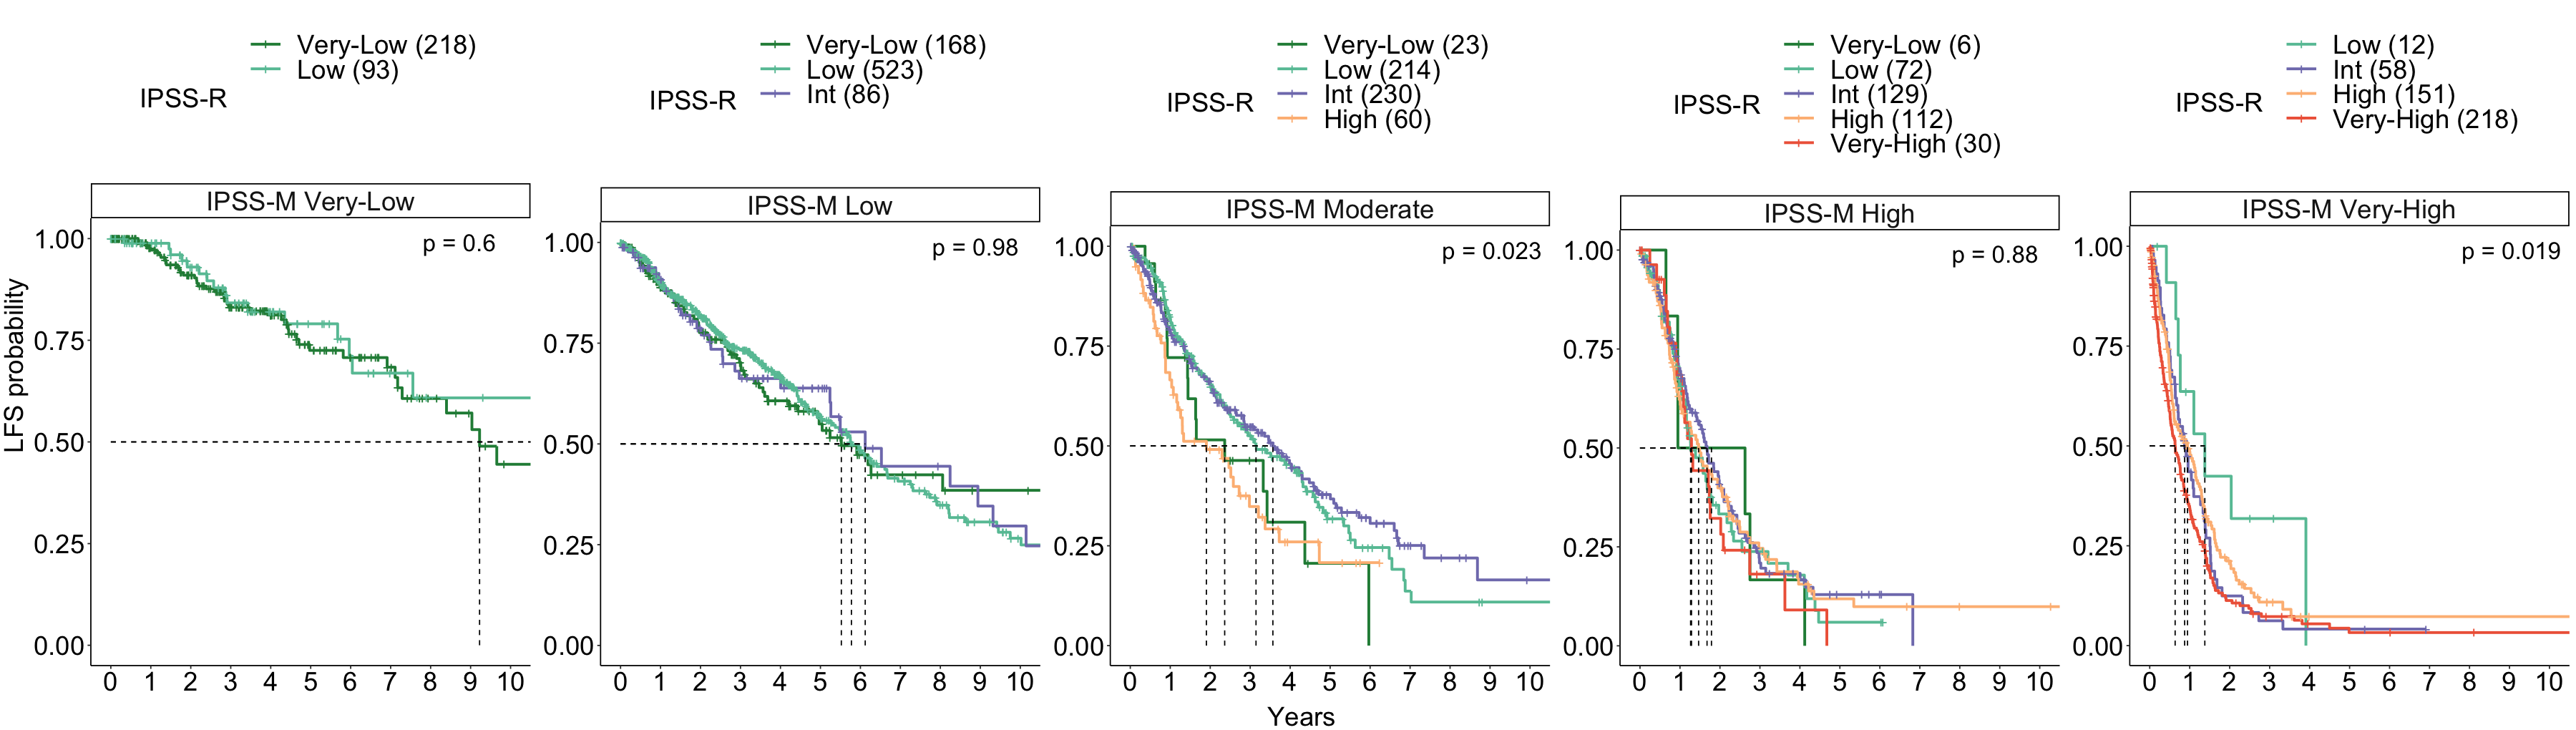

In [859]:
listg1 <- lapply( levels(aa$IPSSM_s) , function(cc) {
    
    hmp <- aa[which(aa$IPSSM_s==cc),]
    
    t <- table(hmp$IPSSR)
    cckeep <- names(t)[which(t>5)]
    hmp <- hmp[hmp$IPSSR%in%cckeep,]
    hmp$IPSSR <- factor(hmp$IPSSR, levels=cckeep)
    
    ff = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","IPSSR"))
    kmfit = survfit(ff,data=hmp)
    kmfit$call$formula <- ff
    myleg = paste0(gsub("IPSSR=","",names(kmfit$strata))," (",kmfit$n,")")
    
    g <- ggsurvplot(kmfit, data=hmp, 
                   color="IPSSR", 
                   legend.labs=myleg, 
                   legend.title="IPSS-M",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(7.8, 0.99), pval.size=7,
                   surv.median.line="hv",
                  )$plot + 
    theme_classic() + gtheme(22) + topleg + 
    theme(legend.key.width = unit(1.1,"cm")) + 
    facet_grid(.~paste("IPSS-M",cc)) + 
    scale_color_manual(name="IPSS-R", values=col.ipssr[which(t>5)]) + 
    noxtitle + noytitle + guides(color=guide_legend(nrow=2)) + 
    guides(color = guide_legend(override.aes = list(shape = NA))) + 
    guides(color=guide_legend(nrow=6))
    
    return(g)
    
    }
)

options(repr.plot.width=30, repr.plot.height=8.5)
figure <- ggarrange(plotlist=listg1, common.legend = F, ncol=5)
fre2 <- annotate_figure(figure,
                left = text_grob("LFS probability", rot = 90, size=22),
                bottom = text_grob("Years", rot = 0, size=22),
                top = ""
)
fre2

## Fig 3C

In [863]:
aa <- dd[ !is.na(dd$IPSSM_SCORE) & !is.na(dd$IPSSR_SCORE) , ]

In [864]:
#Note that 
sum(!is.na(dd$IPSSM_SCORE) & !is.na(dd$IPSSR_SCORE)) # score
#and that
sum(!is.na(dd$IPSSM) & !is.na(dd$IPSSR)) # category

[1] 2649

[1] 2678

The total number of patients for Fig 3B is 2678 (as we took all cases with IPSSM and R categories),
while the total number of patients for Fig 3C is 2649 (as we took all cases with IPSSM and R score).
    
The reason there is a small difference is because for a few patients we could calculate the IPSSR category with certainty but not the IPSSR score (eg missing ANC).

Agree this is slightly unfortunate and we should probably have used the same total number of patients in both Fig 3B and 3C...

In [865]:
# Simplified Categories
l1 <- c("(Very)Low","Int","(Very)High")
aa$simple.ipssr <- car:::recode(aa$IPSSR,
                           "'Very-Low'='(Very)Low'; 'Low'='(Very)Low'; 'High'='(Very)High'; 'Very-High'='(Very)High'")
aa$simple.ipssr <- factor(aa$simple.ipssr, levels=l1)
table(aa$simple.ipssr)

l2 <- c("(Very)Low","Moderate","(Very)High")
aa$simple.ipssm <- car:::recode(aa$IPSSM,
                           "'Very-Low'='(Very)Low'; 'Low'='(Very)Low'; 'Moderate-Low'='Moderate'; 'Moderate-High'='Moderate'; 'High'='(Very)High'; 'Very-High'='(Very)High'")
aa$simple.ipssm <- factor(aa$simple.ipssm, levels=l2)
table(aa$simple.ipssm)


 (Very)Low        Int (Very)High 
      1509        542        598 


 (Very)Low   Moderate (Very)High 
      1251        573        825 

In [866]:
genes.adverse.ipssm <- c("FLT3","TP53multi","NPM1","ETV6","MLL_PTD","KRAS","IDH2","NRAS","CBL","EZH2","U2AF1","RUNX1","DNMT3A","SRSF2","ASXL1","SF3B1_5q")
aa$FLT3[aa$FLT3_ITD==1] <- 1
aa$Nmain <- apply( aa[,genes.adverse.ipssm] , 1 , sum )
aa$Nmain.cat <- aa$Nmain
aa$Nmain.cat[aa$Nmain.cat>=3] = "3 or more"

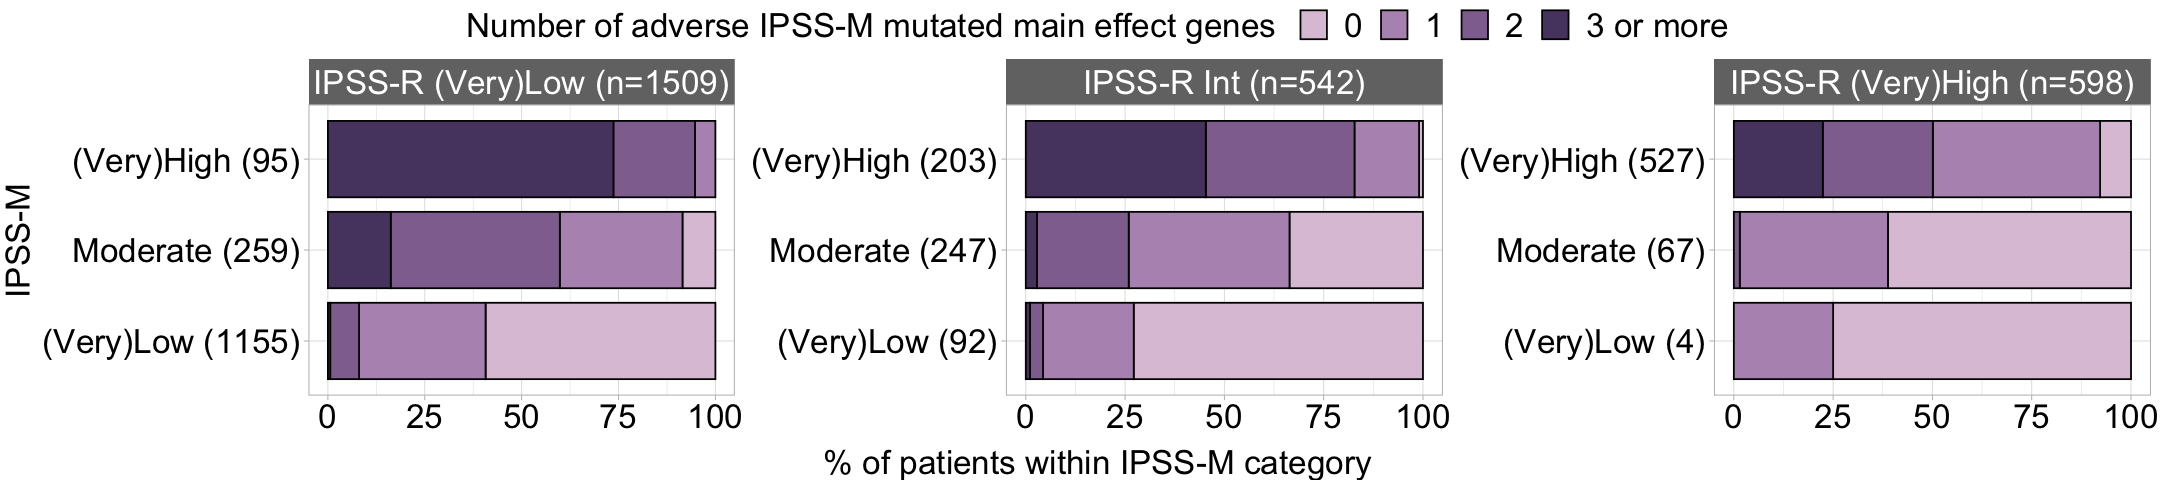

In [867]:
gil <- lapply(levels(aa$simple.ipssr), function(iii) {
aai <- aa[which(aa$simple.ipssr==iii),]
t <- table(aai$simple.ipssm)
myx <- paste0(names(t)," (",t,")")
col.fig3c <- c(
"#f2f0f7",
"#cbc9e2",
"#9e9ac8",
"#6a51a3"
)
col.fig3c <- met.brewer("Cassatt2")
col.fig3c <- rev(col.fig3c[c(2,3,4,5)])
    
gi <- ggplot(aai, aes(x=simple.ipssm, fill=Nmain.cat)) + 
facet_grid(.~paste0("IPSS-R ",iii," (n=",nrow(aai),")")) + 
geom_bar(position="fill",color="black",width=.84) + 
theme_light() + gtheme(20) + 
theme(strip.background =element_rect(fill="grey45")) +
theme(strip.text = element_text(colour = 'white')) + 
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_x_discrete(labels=myx) + 
noxtitle + noytitle + 
scale_fill_manual(name="Number of adverse IPSS-M mutated main effect genes",
                  values=col.fig3c) +
coord_flip() + topleg
return(gi) })

options(repr.plot.width=18, repr.plot.height=4)
figure <- ggarrange(plotlist=gil, common.legend = T, ncol=3)
gnumtrans <- annotate_figure(figure,
                left = text_grob("IPSS-M", rot = 90, size=20),
                bottom = text_grob("% of patients within IPSS-M category", rot = 0, size=20),
               )
gnumtrans

# Figure 4

In [868]:
table(dd$MDS_TYPE, exclude=F)


primary s_t_MDS    <NA> 
   2641     234      82 

In [869]:
ddt <- dd[!is.na(dd$MDS_TYPE),]
ddt$type <- gsub("s_t_MDS","s/t-MDS",ddt$MDS_TYPE)

In [870]:
table(ddt$type, exclude=F)
table(ddt$type, ddt$IPSSM, exclude=F)


primary s/t-MDS 
   2641     234 

         
          Very-Low Low Moderate-Low Moderate-High High Very-High <NA>
  primary      356 821          283           250  330       383  218
  s/t-MDS       14  57           14            23   41        69   16

In [877]:
ddt$IPSSM_s <- as.vector(ddt$IPSSM)
ddt$IPSSM_s[ddt$IPSSM %in% c("Moderate-Low","Moderate-High")] <- "Moderate"
ddt$IPSSM_s <- factor(ddt$IPSSM_s, levels=c("Very-Low","Low","Moderate","High","Very-High"))

[1] "Very-Low"
[1] "Low"
[1] "Moderate"
[1] "High"
[1] "Very-High"


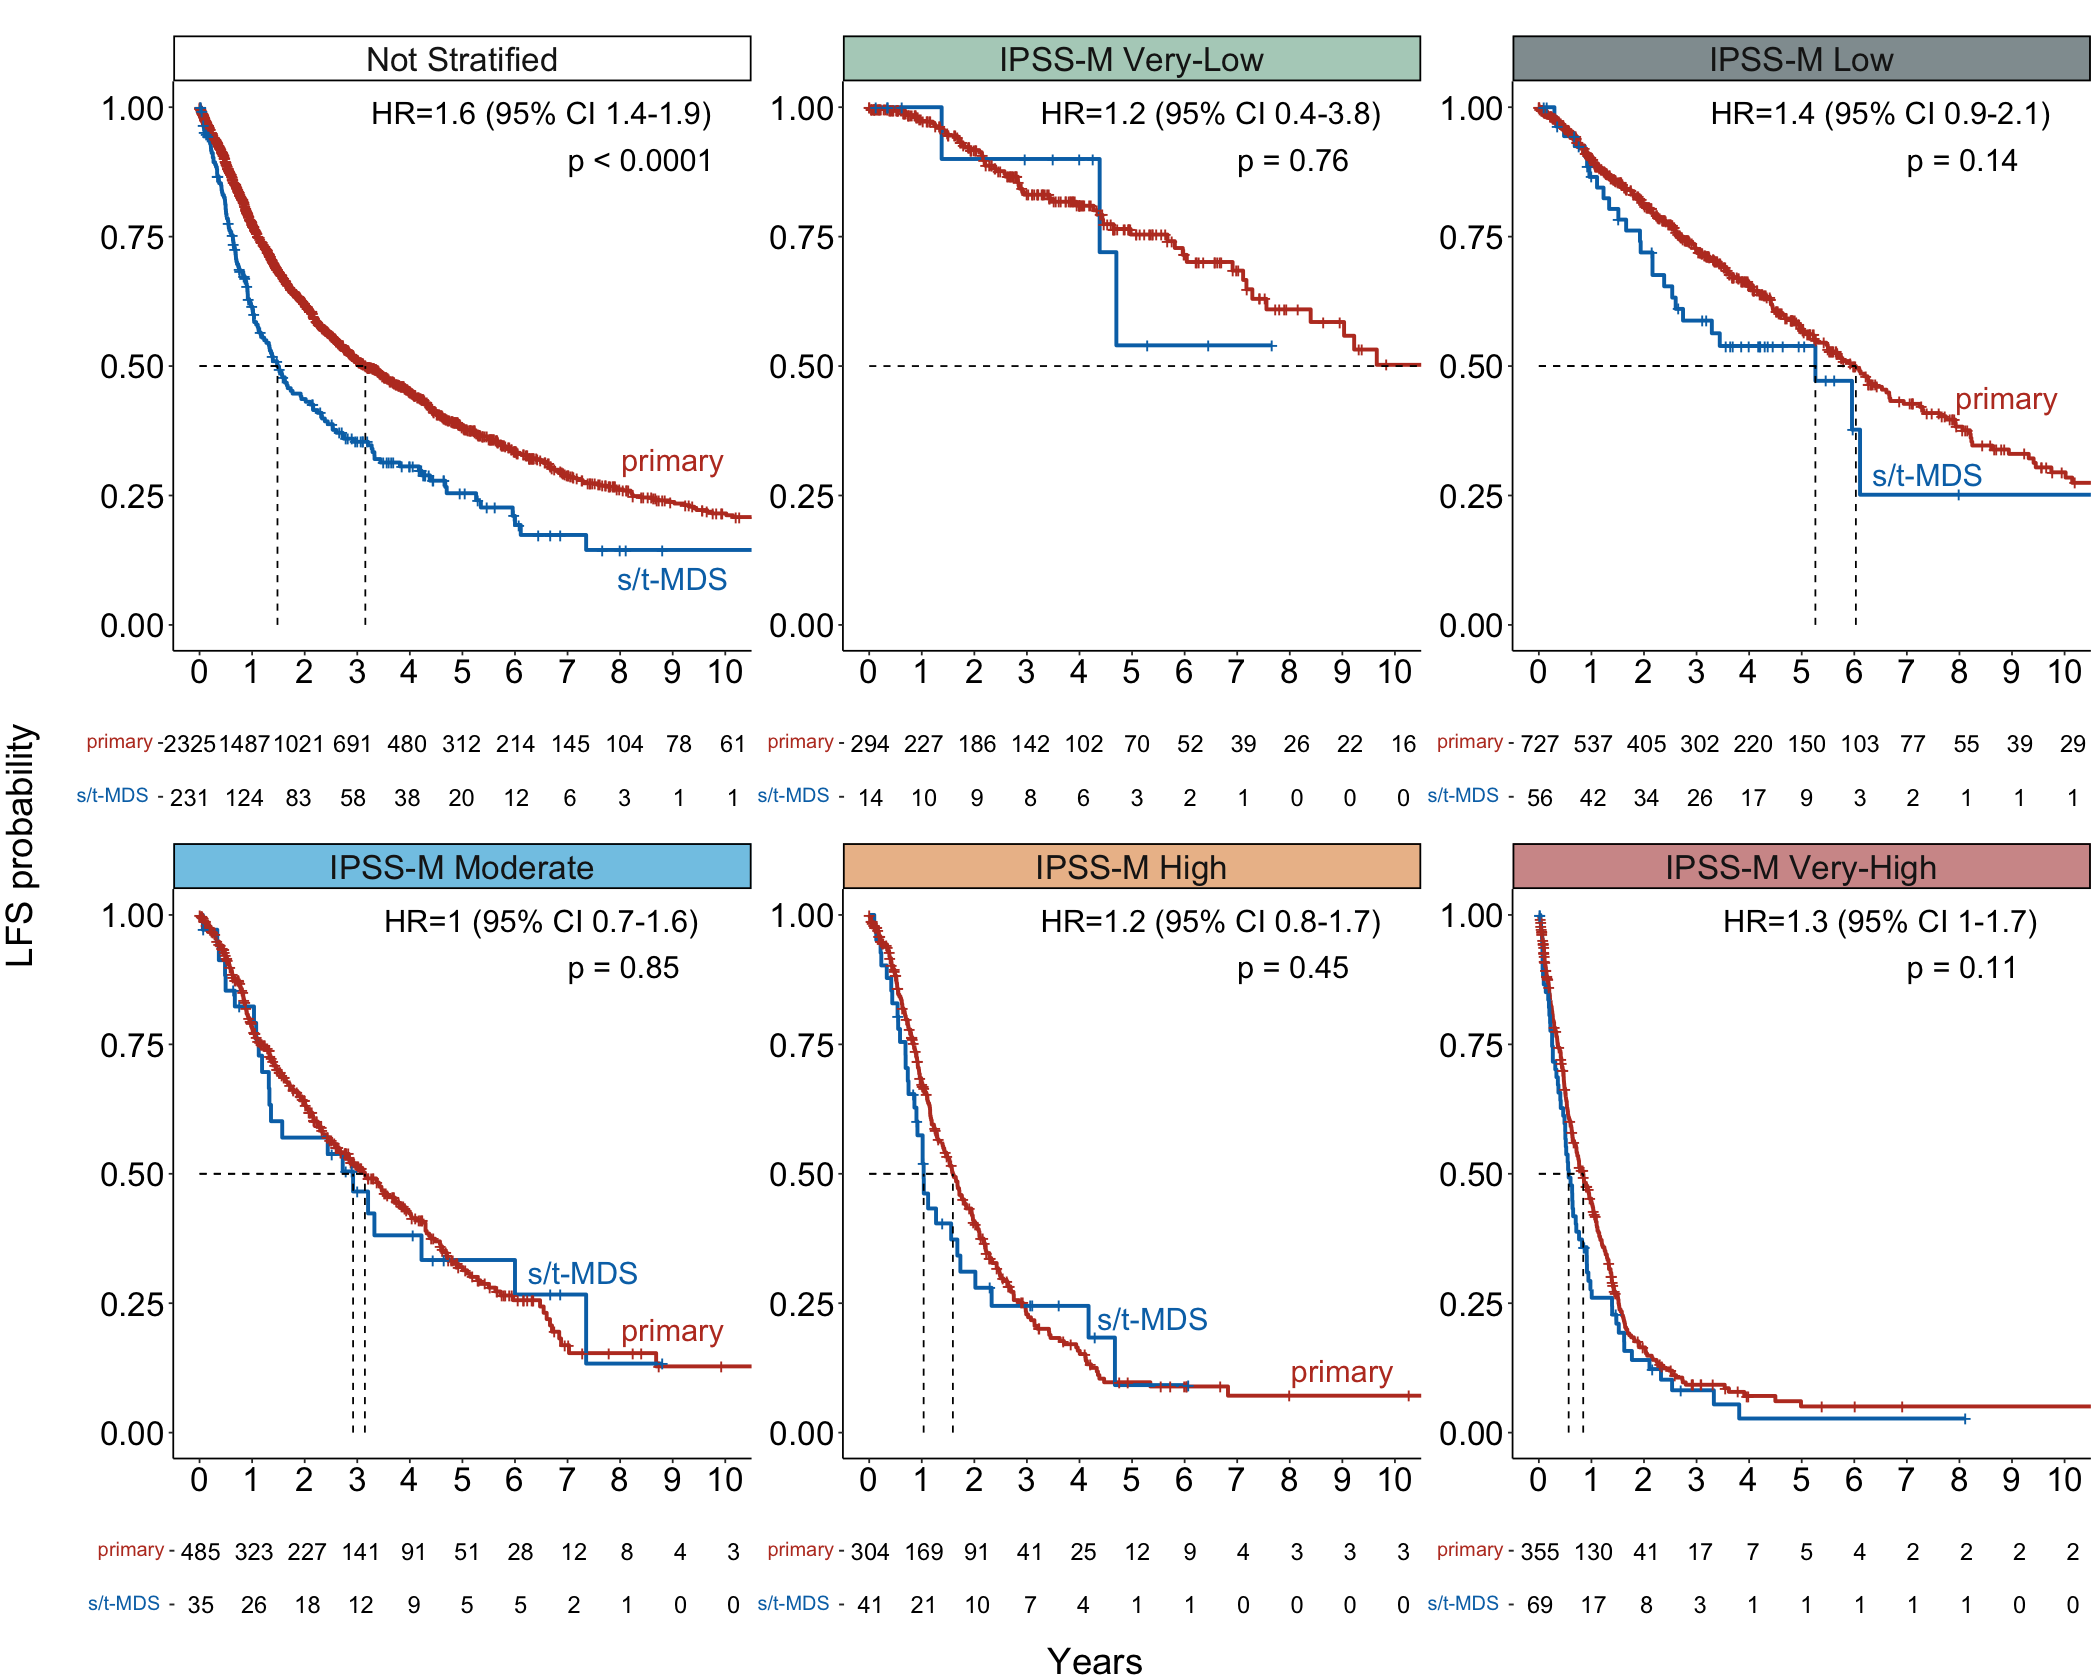

In [879]:
options(repr.plot.width=7, repr.plot.height=5)


if (1==1) {
# Overall    
ff = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","type"))
kmfit = survfit(ff,data=ddt)
kmfit$call$formula <- ff
myleg = paste0(gsub("type=","",names(kmfit$strata))," (",kmfit$n,")")
c <- coxph(ff,data=ddt)
cc <- summary(c)$conf
ccannot <- paste0("HR=",round(cc[,1],1)," (95% CI ",round(cc[,3],1),"-",round(cc[,4],1),")")
    
g <- ggsurvplot(kmfit, data=ddt, conf.int=F, size=1.1, 
                    #legend.labs=myleg,
                    xlim=c(0,10),break.time.by=1,
                    pval=T, pval.coord=c(7.0, 0.9), pval.size=6.5,
                    surv.median.line = "hv",color="type",
                    palette=pal_nejm()(2),
                    risk.table=TRUE,
                    risk.tables.y.text=TRUE,
                    risk.tables.y.text.col=TRUE,
                    risk.table.title="",risk.table.fontsize=5)
    
gf <- g$plot + theme_classic() + gtheme(20) + topleg +
    facet_grid(.~paste("Not Stratified")) +
    theme(legend.key.width = unit(1.1,"cm")) + 
    noxtitle + noytitle + guides(color=guide_legend(nrow=2)) +
    guides(color = guide_legend(override.aes = list(shape = NA))) +
    annotate("label",label=ccannot,x=6.5,y=.99,size=6.5,label.size = NA) + 
    annotate("text", label="primary", x=9, y=0.32, size=6.5, color=pal_nejm()(2)[1]) +
    annotate("text", label="s/t-MDS", x=9, y=0.09, size=6.5, color=pal_nejm()(2)[2])

gtf <- g$table + gtheme(18) +
    theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
    noxtitle + noytitle + noleg
    
p0 <- get_legend(gf)
ggfree0 <- ggarrange(gf+noleg, gtf+theme(plot.margin = unit(c(-0.5, 0, 0, -0.3), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))
    
}
ggcol2 <- ggcol[-4]
# Per Strata
listg <- lapply( 1:length(levels(ddt$IPSSM_s)) , function(ii) {
    cc <- levels(ddt$IPSSM_s)[ii]
    print(cc)
    hmp <- ddt[which(ddt$IPSSM_s==cc),]
    
    t <- table(hmp$IPSSM_s)
    cckeep <- names(t)[which(t>5)]
    hmp <- hmp[hmp$IPSSM_s%in%cckeep,]
    hmp$risk.cat <- factor(hmp$IPSSM_s, levels=cckeep)
    
    ff = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","type"))
    kmfit = survfit(ff,data=hmp)
    kmfit$call$formula <- ff
    myleg = paste0(gsub("type=","",names(kmfit$strata))," (",kmfit$n,")")
    
    lc <- coxph(ff,data=hmp)
    lcc <- summary(lc)$conf
    lccannot <- paste0("HR=",round(lcc[,1],1)," (95% CI ",round(lcc[,3],1),"-",round(lcc[,4],1),")")
    #print(lccannot)
    
    g <- ggsurvplot(kmfit, data=hmp, conf.int=F, size=1.1, 
                    #legend.labs=myleg,
                    xlim=c(0,10),break.time.by=1,
                    pval=T, pval.coord=c(7.0, 0.9), pval.size=6.5,
                    surv.median.line = "hv",color="type",
                    palette=pal_nejm()(2),
                    risk.table=TRUE,
                    risk.tables.y.text=TRUE,
                    risk.tables.y.text.col=TRUE,
                    risk.table.title="",risk.table.fontsize=5)

    gf <- g$plot + theme_classic() + gtheme(20) + noleg +
    facet_grid(.~paste("IPSS-M",cc)) +
    theme(legend.key.width = unit(1.1,"cm")) + 
    noxtitle + noytitle + guides(color=guide_legend(nrow=2)) +
    guides(color = guide_legend(override.aes = list(shape = NA))) +
    annotate("label",label=lccannot,x=6.5,y=.99,size=6.5,label.size = NA) + 
    theme(strip.background=element_rect(fill=alpha(ggcol2[ii],.6)))
    
    if (cc=="Very Low") {
    gf <- gf +
    annotate("text", label="primary", x=8.8, y=0.66, size=6.5, color=pal_nejm()(2)[1]) +
    annotate("text", label="s/t-MDS", x=6, y=0.58, size=6.5, color=pal_nejm()(2)[2])
    }
    if (cc=="Low") {
    gf <- gf +
    annotate("text", label="primary", x=8.9, y=0.44, size=6.5, color=pal_nejm()(2)[1]) +
    annotate("text", label="s/t-MDS", x=7.4, y=0.29, size=6.5, color=pal_nejm()(2)[2])
    }
    if (cc=="Moderate") {
    gf <- gf +
    annotate("text", label="primary", x=9, y=0.2, size=6.5, color=pal_nejm()(2)[1]) +
    annotate("text", label="s/t-MDS", x=7.3, y=0.31, size=6.5, color=pal_nejm()(2)[2])
    }
    if (cc=="High") {
    gf <- gf +
    annotate("text", label="primary", x=9, y=0.12, size=6.5, color=pal_nejm()(2)[1]) +
    annotate("text", label="s/t-MDS", x=5.4, y=0.22, size=6.5, color=pal_nejm()(2)[2])
    }
    if (cc=="Very High") {
    gf <- gf +
    annotate("text", label="primary", x=9, y=0.1, size=6.5, color=pal_nejm()(2)[1]) +
    annotate("text", label="s/t-MDS", x=2.8, y=0, size=6.5, color=pal_nejm()(2)[2])
    }

    gtf <- g$table + gtheme(18) +
    theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
    noxtitle + noytitle + noleg
    
    ggfree <- ggarrange(gf, gtf+theme(plot.margin = unit(c(-0.5, 0, 0, -0.06), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))
    
    return(ggfree)
    }
)
listg1= c(list(ggfree0), listg)
figure <- ggarrange(plotlist=listg1, common.legend = F)
gs88 <- annotate_figure(figure,
                left = text_grob("LFS probability \n ", rot = 90, size=22),
                bottom = text_grob("Years", rot = 0, size=22),
                top = ""
)

options(repr.plot.width=17.5, repr.plot.height=14)
gs88

# Misc

In [882]:
nrow(dd)

[1] 2957

In [888]:
table(dd$IPSSM)
sum(table(dd$IPSSM))


     Very-Low           Low  Moderate-Low Moderate-High          High 
          381           889           302           281           379 
    Very-High 
          469 

[1] 2701

In [885]:
table(dd$IPSSM)
table(dd$IPSSM)/2701


     Very-Low           Low  Moderate-Low Moderate-High          High 
          381           889           302           281           379 
    Very-High 
          469 


     Very-Low           Low  Moderate-Low Moderate-High          High 
    0.1410589     0.3291374     0.1118104     0.1040355     0.1403184 
    Very-High 
    0.1736394 

# R session

In [881]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-3 tidyr_1.2.0        cmprsk_2.2-11      ipssm_0.0.0.9000  
 [5] devtools_2.4.3     usethis_2.1.5      survminer_0.4.9    survival_3.2-13   
 [9] cowplot_1.1.1      MetBrewer_0.2.0    ggpubr_0.4.0       gridExtra_2.3     
[13] ggsci_2.9          dplyr_1.0.8        ggplot2_3.3.6     

loaded via a namespace (and not attached):
 [1] pkgload_1.2.4     jsonlite_1.7.2    splines_3.6.1     carData_3.0-5    
 [5] brio_1.1.3        assertthat_0.2.1  remotes_2.4.2     sessioninfo